# **Importacion de Librerias**

In [ ]:
! pip install pingouin
! pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pingouin as pg
import requests
import json
import csv
from io import StringIO
import shutil
import os
import math
import statsmodels.formula.api as sm
import statsmodels.api as sm2
import statsmodels.tools as sm_tools
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut,StratifiedKFold,cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# **Trabajo Data Science: Análisis de Mortalidad**

En este texto, estuve explorando formas de predecir la tasa de mortalidad para distintas causas de muertes en distintos países. Tomo dos archivos de Kaggle. El primero, con de distintos datos vitales. El segundo, específicamente con causas de muertes en distintos países del mundo, y en distintos años.

En la primera sección, mi intención es tomar los distintos años y países, y agrupar los países, así como buscar correlaciones entre las distintas situaciones. Esto es relevante para, por ejemplo, distinguir políticas públicas diferenciadas. Algunos de los casos ("países pobres" y "países ricos") son intuitivos. Pero varios de estos casos no son tan claros.

Además, voy a intentar tomar los distintos años y países, y ver si puedo predecir las muertes relevantes por enfermedades ligadas a la diarrea. Esto puede llegar a predecir estas situaciones, y tener una política más específica.

En la segunda sección, mi intención es buscar causas de la mortalidad infantil que va más allá del ingreso económico, usando técnicas de Machine Learning. Uso dos datasets de Kaggle.

# Objetivos

Analizar causas de mortalidad infantil y predecir muertes por enfermedades ligadas a la diarrea

# Contexto


Políticas públicas orientadas a disminuir la mortalidad infantil, así como otras enfermedades, desde enfermedades neonatales, hasta suicidios, requieren de decisiones basadas en la evidencia. Este trabajo intenta construir estas herramientas.

#Hipótesis

Una de las principales causas de las diferencias entre las proporciones de muertes es el ingreso económico, sin embargo propongo como hipótesis que este no es el único factor relevante para analizar el problema.

Las muertes por diarrea están altamente ligadas a las situaciones de pobreza. De hecho, son unas de las principales causas de mortalidad infantil. Sin embargo, voy a mostrar que no es la pobreza específicamente la que causa este tipo de muertes, sino el desarrollo, y especialmente el agua potable y las cloacas.

Por otro lado, aquellas enfermedades no relacionadas al nivel de ingreso (las cuales van a resultar ligadas a suicidios, drogadicción, etc) son necesarias de analizar con cuidado.

#Stakeholders

Se propone como Stakeholders Gobiernos, ONGs y Organismos Internacionales, tales como la OMS o la ONU.

#Motivación

Abordar las problemáticas de Salud Pública desde una perspectiva basada en la evidencia.

# **1. Análisis de muertes relativas en el mundo**

##Preparación de los datos

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/alangivre/coderhouse/main/cause_of_deaths.csv')

La matriz contiene la cantidad de muertes para distintas formas de ocurrencia, distintos países y años.

In [ ]:
pd.set_option('display.max_columns', 34)
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,2655,34,93,4661,44899,23741,15612,72,696,0,4235,175,11580,1490,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,2885,41,102,4743,45492,24504,17128,75,751,1347,4927,113,11796,3370,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,3315,48,118,4976,46557,27404,20060,80,855,614,6123,38,12218,4344,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,3671,56,132,5254,47951,31116,22335,85,943,225,8174,41,12634,4096,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,3863,63,142,5470,49308,33390,23288,88,993,160,8215,44,12914,8959,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [ ]:
df.shape

(6120, 34)

## Preprocesamiento de los datos

In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('-', '_')
df.columns = df.columns.str.replace('/', '_')
df.columns = df.columns.str.replace(',', '')
df.columns = df.columns.str.replace("'", "", regex=True)

In [ ]:
df.describe()

,Year,Meningitis,Alzheimers_Disease_and_Other_Dementias,Parkinsons_Disease,Nutritional_Deficiencies,Malaria,Drowning,Interpersonal_Violence,Maternal_Disorders,HIV_AIDS,Drug_Use_Disorders,Tuberculosis,Cardiovascular_Diseases,Lower_Respiratory_Infections,Neonatal_Disorders,Alcohol_Use_Disorders,Self_harm,Exposure_to_Forces_of_Nature,Diarrheal_Diseases,Environmental_Heat_and_Cold_Exposure,Neoplasms,Conflict_and_Terrorism,Diabetes_Mellitus,Chronic_Kidney_Disease,Poisonings,Protein_Energy_Malnutrition,Road_Injuries,Chronic_Respiratory_Diseases,Cirrhosis_and_Other_Chronic_Liver_Diseases,Digestive_Diseases,Fire_Heat_and_Hot_Substances,Acute_Hepatitis
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000
mean,2004.500000,1719.701307,4864.189379,1173.169118,2253.600000,4140.960131,1683.333170,2083.797222,1262.589216,5941.898529,434.006699,7491.928595,7.316045e+04,13687.914706,12558.942647,787.421242,3874.825327,243.485621,1.082280e+04,292.295915,3.754224e+04,538.243954,5138.704575,4724.132680,425.013399,1965.994281,5930.795588,1.709237e+04,6124.072059,10725.267157,588.711438,618.429902
std,8.656149,6672.006930,18220.659072,4616.156238,10483.633601,18427.753137,8877.018366,6917.006075,6057.973183,21011.962487,2898.761628,39549.977578,2.915775e+05,48031.720009,56058.366412,3545.823616,18425.616418,4717.104377,6.541617e+04,1704.466356,1.615584e+05,7033.308187,16773.081040,16470.429969,2022.640521,8255.999063,24097.784291,1.051572e+05,20688.118580,37228.051096,2128.595120,4186.023497
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,15.000000,90.000000,27.000000,9.000000,0.000000,34.000000,40.000000,5.000000,11.000000,3.000000,35.000000,2.028000e+03,345.000000,131.000000,9.000000,94.000000,0.000000,2.000000e+01,2.000000,8.097500e+02,0.000000,236.000000,145.750000,6.000000,5.000000,174.750000,2.890000e+02,154.000000,284.000000,17.000000,2.000000
50%,2004.500000,109.000000,666.500000,164.000000,119.000000,0.000000,177.000000,265.000000,54.000000,136.000000,20.000000,417.000000,1.174200e+04,2126.500000,916.000000,80.000000,533.000000,0.000000,2.965000e+02,21.000000,5.629500e+03,0.000000,1087.000000,822.000000,52.500000,92.000000,966.500000,1.689000e+03,1210.000000,2185.000000,126.000000,15.000000
75%,2012.000000,847.250000,2456.250000,609.250000,1167.250000,393.000000,698.000000,877.000000,734.000000,1879.000000,129.000000,2924.250000,4.254650e+04,10161.250000,7419.750000,316.000000,1882.250000,12.000000,3.946750e+03,109.000000,2.014775e+04,23.000000,2954.000000,2922.500000,254.000000,1042.500000,3435.250000,5.249750e+03,3547.250000,6080.000000,450.000000,160.000000
max,2019.000000,98358.000000,320715.000000,76990.000000,268223.000000,280604.000000,153773.000000,69640.000000,107929.000000,305491.000000,65717.000000,657515.000000,4.584273e+06,690913.000000,852761.000000,55200.000000,220357.000000,222641.000000,1.119477e+06,29048.000000,2.716551e+06,503532.000000,273089.000000,222922.000000,30883.000000,202241.000000,329237.000000,1.366039e+06,270037.000000,464914.000000,25876.000000,64305.000000


In [ ]:
paises=df['Country_Territory']
años=df['Year']

In [ ]:
dfT=df.T
valoresT=dfT.iloc[3:34]
valores=valoresT.T

Las muertes van a ser normalizadas por el total de muertes, para que sean valores relativos. Recomiendo normalizar por la población, pero no tenía aceso a esto.

In [ ]:
exclude_columns = ['Country_Territory', 'Code', 'Year']

# Select only the columns you want to normalize
columns_to_normalize = df.columns.difference(exclude_columns)

# Normalize by the sum in each row
normalized_df = df[columns_to_normalize].div(df[columns_to_normalize].sum(axis=1), axis=0)

# Concatenate the excluded columns with the normalized DataFrame
final_normalized_df = pd.concat([df[exclude_columns], normalized_df], axis=1)

In [ ]:
df_arg=df[df['Code']=='ARG']
df_arg_1990 = df[(df['Code'] == 'ARG') & (df['Year'] == 1990)]
df_arg_1991 = df[(df['Code'] == 'ARG') & (df['Year'] == 1991)]

df_arg_1990=pd.DataFrame(df_arg_1990.T[4:34])
df_arg_1991=pd.DataFrame(df_arg_1991.T[4:34])

## Análisis de un caso particular: Argentina

Las muertes por accidentes de tránsito en Argentina aumentaron desde 1990.

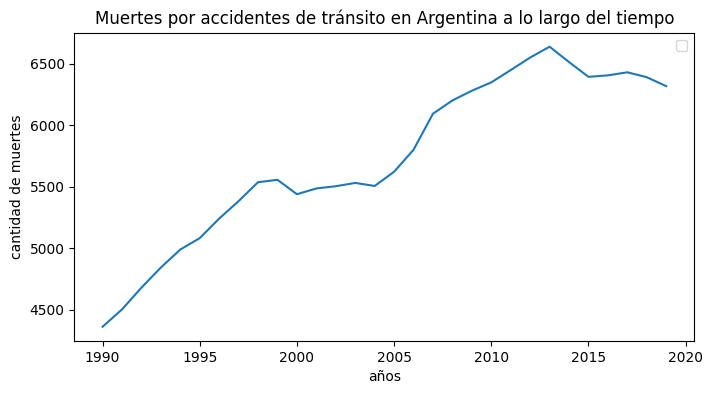

In [ ]:
fig, axs = plt.subplots(figsize=(8, 4))
axs.plot(df_arg['Year'],df_arg['Road_Injuries'])
axs.set_xlabel('años')
axs.set_ylabel('cantidad de muertes')
axs.set_title('Muertes por accidentes de tránsito en Argentina a lo largo del tiempo')
axs.legend()

En Argentina, las muertes de hambre y del corazón estuvieron inversamente correlacionadas

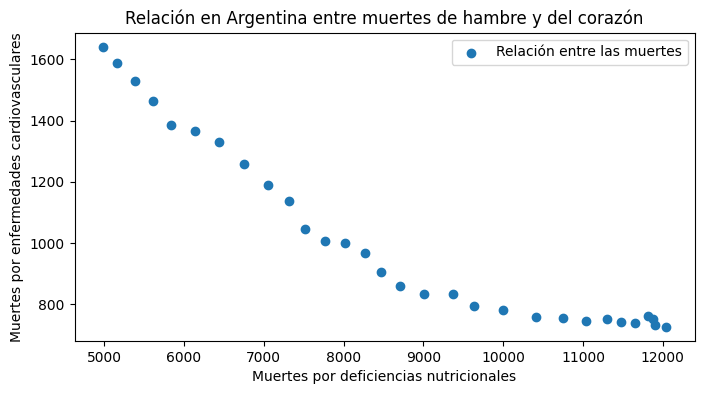

In [ ]:
fig, axs = plt.subplots(figsize=(8, 4))
axs.scatter(df_arg.iloc[:,4], df_arg.iloc[:,13], label='Relación entre las muertes')
axs.set_xlabel('Muertes por deficiencias nutricionales')
axs.set_ylabel('Muertes por enfermedades cardiovasculares')
axs.set_title('Relación en Argentina entre muertes de hambre y del corazón')
axs.legend()

## Distribución de muertes a nivel mundial

La distribución de muertes de hambre (en países del mundo) normalizado con la cantidad total de muertes (en el dataframe no está la población).

La curva parece una exponencial, lo cual puede llegar a ser interesante para analizar en una ocasión posterior.

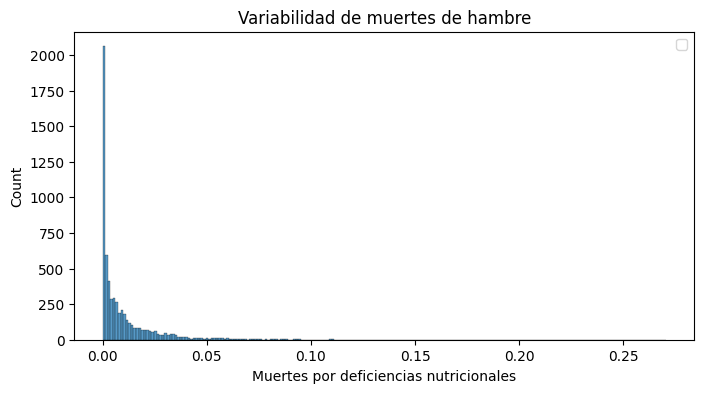

In [ ]:
fig, axs = plt.subplots(figsize=(8, 4))
sns.histplot(data=final_normalized_df, x='Nutritional_Deficiencies')
axs.set_xlabel('Muertes por deficiencias nutricionales')
axs.set_title('Variabilidad de muertes de hambre')
axs.legend()

Las muertes de hambre y las ligadas a la diarrea están anticorrelacionadas, mientras que las ligadas a la diarrea están correlacionadas entre sí, mostrando una separación entre "países ricos" y "países pobres"

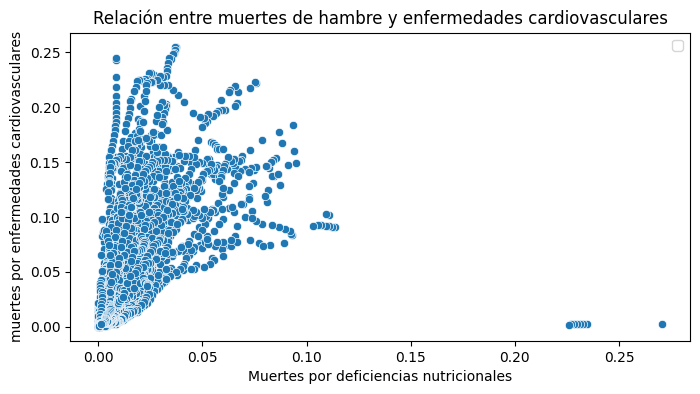

In [ ]:
fig, axs = plt.subplots(figsize=(8, 4))
sns.scatterplot(data=final_normalized_df, x='Nutritional_Deficiencies', y='Diarrheal_Diseases')
axs.set_xlabel('Muertes por deficiencias nutricionales')
axs.set_ylabel('muertes por enfermedades cardiovasculares')
axs.set_title('Relación entre muertes de hambre y enfermedades cardiovasculares')
axs.legend()

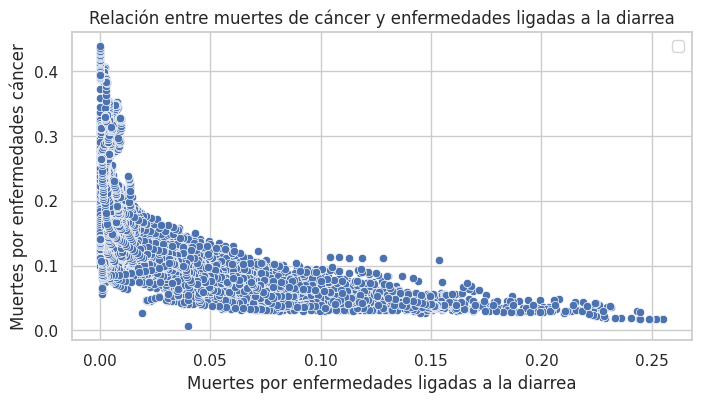

In [ ]:
fig, axs = plt.subplots(figsize=(8, 4))
sns.scatterplot(data=final_normalized_df, x='Diarrheal_Diseases', y='Neoplasms')
axs.set_xlabel('Muertes por enfermedades ligadas a la diarrea')
axs.set_ylabel('Muertes por enfermedades cáncer')
axs.set_title('Relación entre muertes de cáncer y enfermedades ligadas a la diarrea')
axs.legend()

Muestro las correlaciones de otras maneras:

In [ ]:
pg.corr(final_normalized_df['Diarrheal_Diseases'],final_normalized_df['Neoplasms'])

,n,r,CI95%,p-val,BF10,power
pearson,6120,-0.684428,"[-0.7, -0.67]",0.0,inf,1.0


In [ ]:
pg.corr(final_normalized_df['Nutritional_Deficiencies'],final_normalized_df['Diarrheal_Diseases'])

,n,r,CI95%,p-val,BF10,power
pearson,6120,0.615636,"[0.6, 0.63]",0.0,inf,1.0


In [ ]:
pg.corr(final_normalized_df['Neoplasms'],final_normalized_df['Neonatal_Disorders'])

,n,r,CI95%,p-val,BF10,power
pearson,6120,-0.755858,"[-0.77, -0.74]",0.0,inf,1.0


In [ ]:
pg.corr(final_normalized_df['Nutritional_Deficiencies'],final_normalized_df['Neonatal_Disorders'])

,n,r,CI95%,p-val,BF10,power
pearson,6120,0.514991,"[0.5, 0.53]",0.0,inf,1.0


Al hacer la matriz de correlación se puede observar que hay dos tipos de muertes que están por completo no correlacionados a ninguna otra.

Esto es: exposición a fuerzas de la naturaleza, y conflictos y terrorismo.

<ipython-input-21-e44370390fa4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

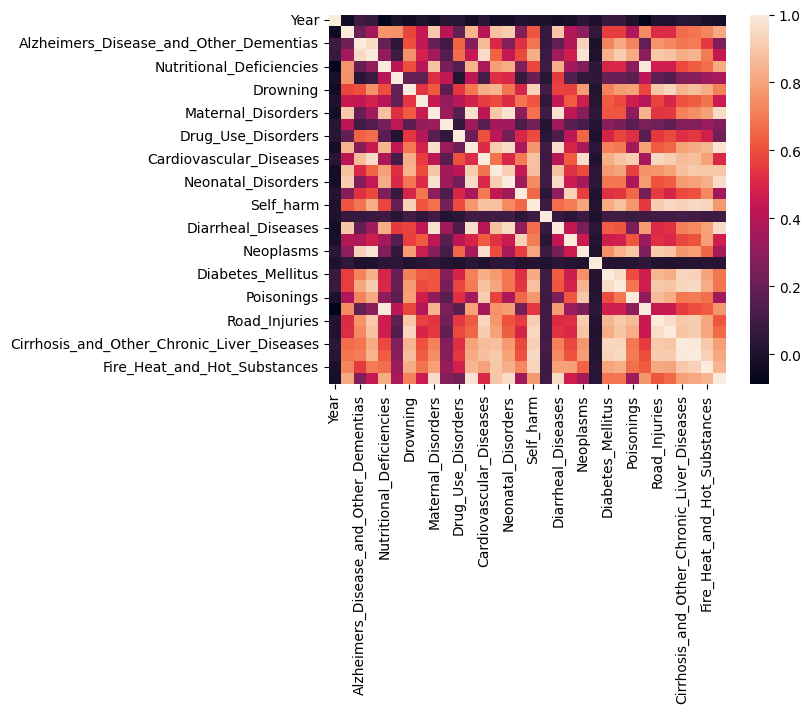

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
sns.heatmap(correlation_matrix)

In [ ]:
#Existe una pequeña relación entre el HIV y la malaria (por ser países africanos)
model = 'HIV_AIDS~Malaria'
lm    = sm.ols(formula = model, data = final_normalized_df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               HIV_AIDS   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     685.1
Date:                Tue, 19 Mar 2024   Prob (F-statistic):          3.07e-143
Time:                        00:32:22   Log-Likelihood:                 7175.9
No. Observations:                6120   AIC:                        -1.435e+04
Df Residuals:                    6118   BIC:                        -1.433e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0232      0.001     22.083      0.0

## Conclusiones I


Se puede ver muy claramente una relación ligada al nivel económico: Cáncer y Enfermedades Cardiovasculares están fuertemente correlacionadas entre sí, y anticorrelacionadas con Desórdenes Neonatales y Deficiencias Nutricionales, las cuales están correlacionadas entre sí. Por otro lado, solamente hay dos tipos de muertes que no están correlacionadas al resto: exposición a las fuerzas de la naturaleza y conflictos y terrorismo. Por último, existe una pequeña correlación entre malaria y HIV, debido a los países africanos.

## Clusterización y Reducción de dimensionalidad

Antes de comenzar, tengo que realizar una separación de la variable del porcentaje de muertes por enfermedades ligadas a la diarrea, la cual más adelante será la variable predicha.

In [ ]:
matrix=final_normalized_df.iloc[:,3:]

X = matrix.drop(columns='Diarrheal_Diseases')
X.iloc[1:] = X.iloc[1:]/ (1 - matrix['Diarrheal_Diseases'].values[1:, np.newaxis])       # feature matrix
y = matrix['Diarrheal_Diseases']

Primero estandarizamos los datos

In [ ]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X2 = pd.DataFrame(X_scaled, columns=X.columns)

Aquí voy a empezar a realizar la clusterización. Se puede ver que, sin escaleo, una buena cantidad de clusters son unos 4. Sin embargo, con escaleo, es más difícil hacer esa estimación.

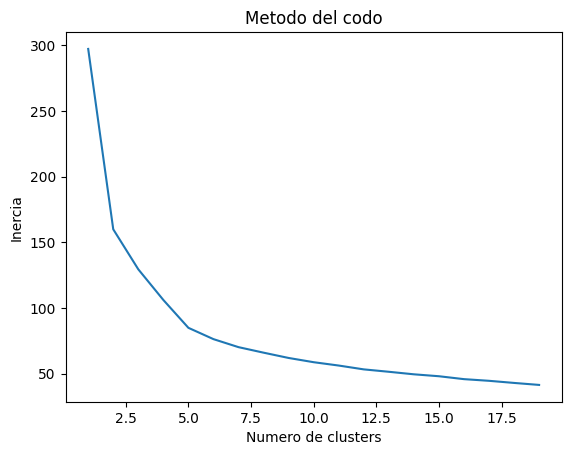

In [ ]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')
plt.show()

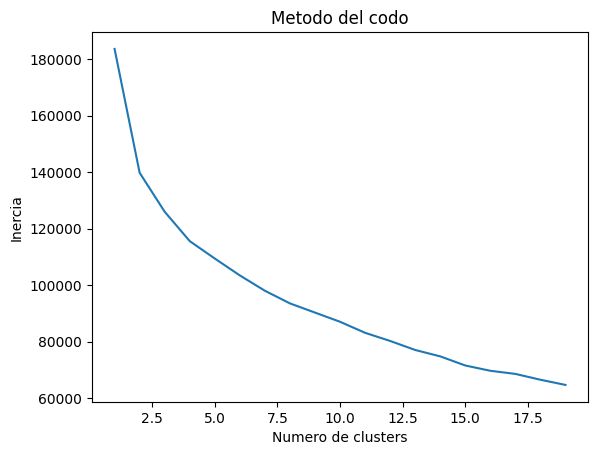

In [ ]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')
plt.show()

Ya que estamos voy a comparar 3 a 5 clusters mediante el método de Silhouette. Descubro que definitivamente tengo que usar 3 clusters, no 4.

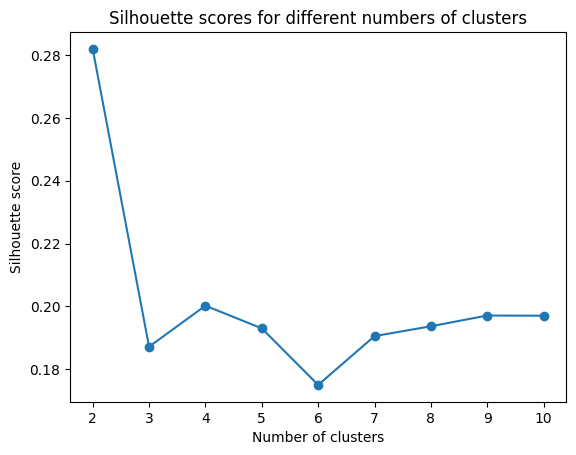

In [ ]:
silhouette_scores = []
for n_clusters in range(2, 11):  # You can adjust the range as per your need
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X2)
    silhouette_avg = metrics.silhouette_score(X2, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette scores for different numbers of clusters')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X2)

Luego calculamos el PCA


In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X2)

In [ ]:
X_pca.shape

(6120, 30)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is:  0.18715139236380676


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is:  0.20003235307353595


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is:  0.1877816904785506


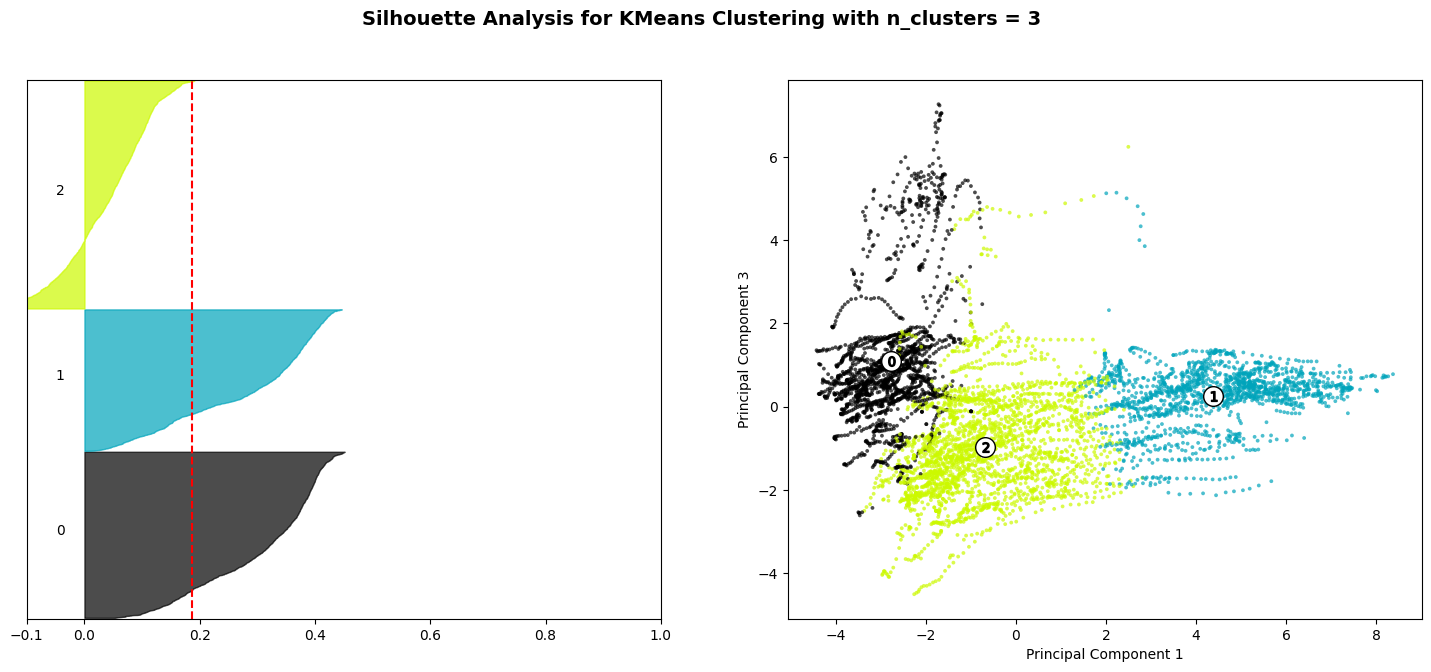

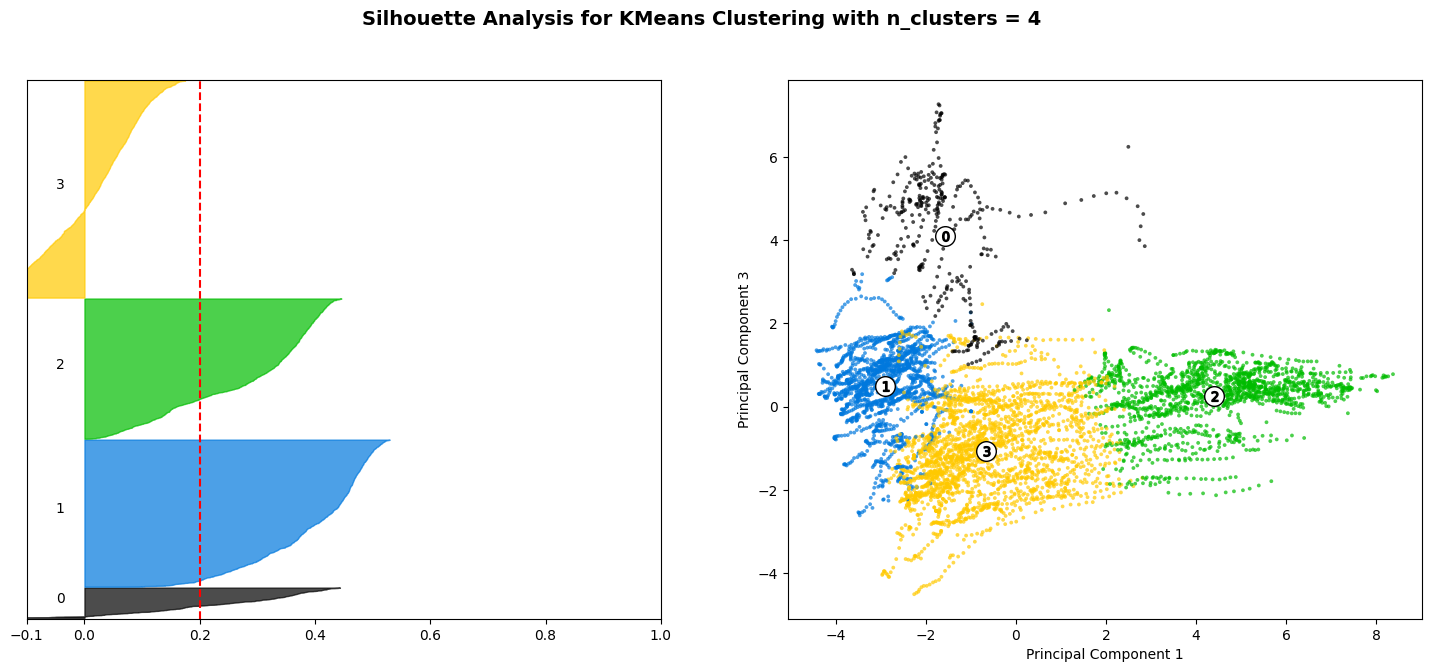

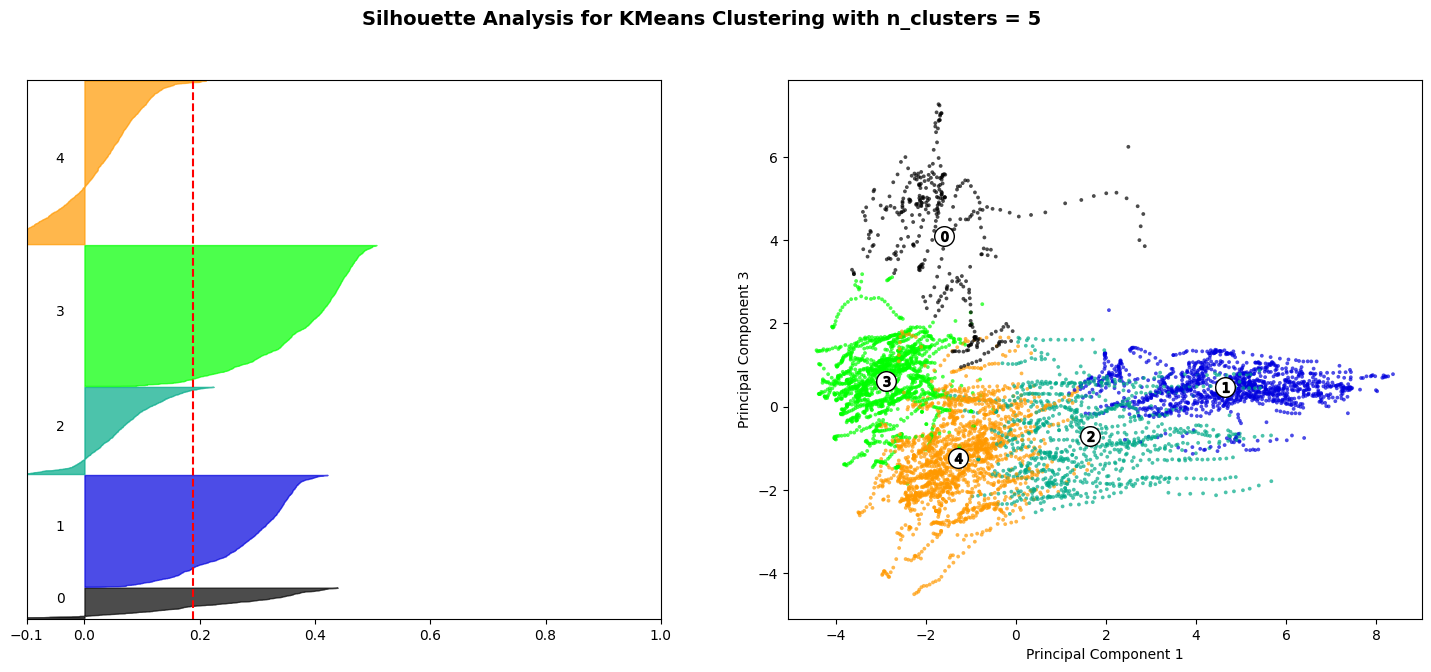

In [ ]:
for n_clusters in range(3, 6):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is for the silhouette score
    # The silhouette score ranges from [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])

    # Initialize the KMeans clustering algorithm
    clusterer = KMeans(n_clusters=n_clusters, max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X_pca)

    silhouette_avg = metrics.silhouette_score(X_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is: ", silhouette_avg)

    sample_silhouette_values = metrics.silhouette_samples(X_pca, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)

        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 2], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 2], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[2], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_xlabel("Principal Component 1")
    ax2.set_ylabel("Principal Component 3")

    plt.suptitle(("Silhouette Analysis for KMeans Clustering "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([3.00396789e-01, 9.04110387e-02, 8.14887702e-02, 6.48685054e-02,
       5.13797503e-02, 4.30774529e-02, 4.09564190e-02, 3.67540617e-02,
       3.34135103e-02, 3.19949590e-02, 2.85798209e-02, 2.52949961e-02,
       2.28706688e-02, 2.14579266e-02, 1.74794969e-02, 1.66890718e-02,
       1.54395914e-02, 1.17007559e-02, 1.07072947e-02, 9.93945863e-03,
       9.50673319e-03, 7.83853403e-03, 6.94491440e-03, 5.61381907e-03,
       5.03515693e-03, 4.38036797e-03, 3.19850004e-03, 2.55427145e-03,
       2.72740615e-05, 9.03784486e-08])

In [ ]:
kmeans_pca = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y_pca = kmeans_pca.fit_predict(X_pca)

Como se puede ver, hay muchos componetes relevantes. El primer componente puede explicar un 31% de la varianza, el segundo, un 9% de la varianza, el tercero explica un 8% de la varianza. La cola explicativa es larga, lo cual implica que las variables son considerablemente independientes, exceptuando la primer variable.

Se puede graficar estos clusters en la primer y tercer componente:

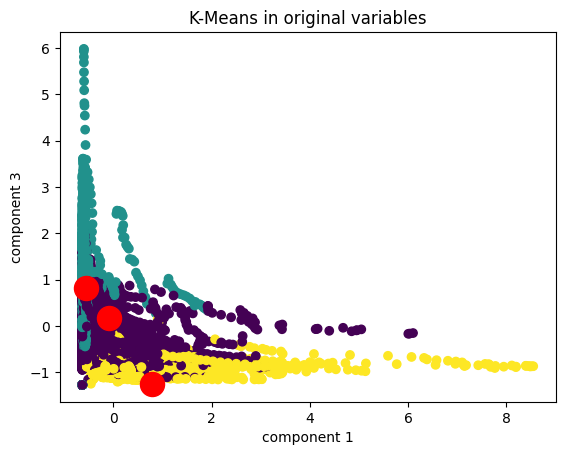

In [ ]:
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 2], c=pred_y, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s=300, c='red')
plt.xlabel("component 1")
plt.ylabel("component 3")
plt.title("K-Means in original variables")
plt.show()

Y para comparar, se puede graficar estos clusters en las dos componentes principales. Notar que es importante mantener la primer componente (la cual tiene un 31%), pero la siguiente puede elegirse la segunda, tercera o cuarta, priorizando la estética para el k-means.

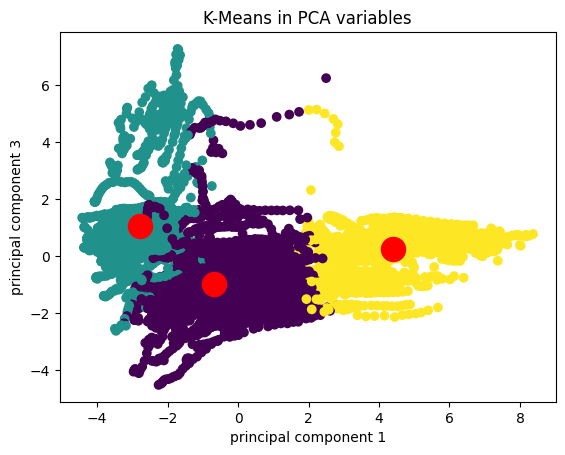

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,2], c=pred_y_pca, cmap='viridis')
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 2], s=300, c='red')
plt.xlabel("principal component 1")
plt.ylabel("principal component 3")
plt.title("K-Means in PCA variables")
plt.show()

In [ ]:
kmeans_pca.cluster_centers_[:, 2]

array([-0.95935783,  1.07902279,  0.27019534])

Ahora, nótese que de estos clusters, los clusters 1,2 y 3, están mayormente alineados en relación a la componente principal, probablemente ligado a los ingresos per capita del país. Sin embargo, el cluster 0 sólo se puede diferenciar mediante otro componente (aquí elegido el tercero). Como se mostrará después, este es el cluster más chico, y parece estar ligado a alcohol, suicidios y drogadicción. Plausiblemente, esto es Rusia y países ex soviéticos, o quizás EEUU. sugiero prestar atención a este cluster.

Con las variables estandarizadas y el PCA. Se puede ver que el grupo 1 es el más grande, mientras que el 0 es el más chico. No se normaliza porque ya está con el standardscaler.

In [ ]:
df_norm_3 = X2.copy()
df_norm_3['labels'] = pred_y_pca

In [ ]:
df_norm_3['labels'].value_counts()

0    2601
1    1907
2    1612
Name: labels, dtype: int64

In [ ]:
pd.set_option('display.max_columns', 32)
df_norm_3.groupby('labels').mean()

,Acute_Hepatitis,Alcohol_Use_Disorders,Alzheimers_Disease_and_Other_Dementias,Cardiovascular_Diseases,Chronic_Kidney_Disease,Chronic_Respiratory_Diseases,Cirrhosis_and_Other_Chronic_Liver_Diseases,Conflict_and_Terrorism,Diabetes_Mellitus,Digestive_Diseases,Drowning,Drug_Use_Disorders,Environmental_Heat_and_Cold_Exposure,Exposure_to_Forces_of_Nature,Fire_Heat_and_Hot_Substances,HIV_AIDS,Interpersonal_Violence,Lower_Respiratory_Infections,Malaria,Maternal_Disorders,Meningitis,Neonatal_Disorders,Neoplasms,Nutritional_Deficiencies,Parkinsons_Disease,Poisonings,Protein_Energy_Malnutrition,Road_Injuries,Self_harm,Tuberculosis
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.086918,0.027376,-0.158366,0.168004,0.654378,0.264318,0.384699,0.023247,0.577763,0.324365,0.562545,-0.021322,-0.194105,0.064882,0.181699,-0.258826,0.385726,-0.180386,-0.398173,-0.260590,-0.339372,-0.090612,-0.147139,-0.263680,-0.063219,-0.121754,-0.269027,0.440771,0.051252,-0.287901
1,-0.551152,0.377899,0.978168,0.824635,-0.362572,0.047344,-0.378486,-0.121872,-0.334035,-0.184002,-0.660876,0.364188,0.318901,-0.061911,-0.374954,-0.406505,-0.397597,-0.713207,-0.449970,-0.758733,-0.610950,-0.903235,1.120077,-0.532887,0.964368,-0.441758,-0.521751,-0.507536,0.370285,-0.703496
2,0.792259,-0.491227,-0.901648,-1.246623,-0.626931,-0.482491,-0.172972,0.106666,-0.537071,-0.305695,-0.125862,-0.396432,-0.064068,-0.031448,0.150396,0.898518,-0.152020,1.134782,1.174777,1.318051,1.270341,1.214734,-1.087642,1.055859,-1.038845,0.719053,1.051314,-0.110778,-0.520744,1.296772


Por último, vamos a agregar las variables sintéticas del PCA y de la clusterización al sistema original

In [ ]:
df_norm_3['pca0']=X_pca[:,0]
df_norm_3['pca2']=X_pca[:,2]

Realizamos un One Hot Encoder para el label

In [ ]:
# Using pandas.get_dummies() to get one-hot encoded columns
one_hot_encoded = pd.get_dummies(df_norm_3['labels'])

# Renaming the columns
one_hot_encoded.columns = ['labels0', 'labels1', 'labels2']

# Dropping the original 'labels' column and concatenating the one-hot encoded columns
df_norm_4 = pd.concat([df_norm_3.drop('labels', axis=1), one_hot_encoded], axis=1)

## Conclusiones 2



Realizado el StandardScaler y el PCA, los clusters ocurren de la siguiente manera:

El cluster 2 está ligado fuertemente a la pobreza (la Malaria africana, diarrea, desórdenes maternales, desórdenes neonatales, etc).

El cluster 1 está ligado a países ricos (alto alzeheimer, cáncer, enfermedad de Parkinson, etc)

El cluster 0 -el cual es muy chico, por lejos el más chico de todos- está ligado al alcohol, a la exposición de las fuerzas de la naturaleza (=frío) y también al suicidio y drogadicción ¿Será Rusia y otros países ex-soviéticos, y/o quizás EEUU?

## Búsqueda de predicción de las enfermedades ligadas a la diarrea



Voy a elegir Enfermedades ligadas a la diarrea para predecir por ser la causa más frecuente de muertes entre aquellas ligadas a la pobreza.

In [ ]:
df_norm_4

,Acute_Hepatitis,Alcohol_Use_Disorders,Alzheimers_Disease_and_Other_Dementias,Cardiovascular_Diseases,Chronic_Kidney_Disease,Chronic_Respiratory_Diseases,Cirrhosis_and_Other_Chronic_Liver_Diseases,Conflict_and_Terrorism,Diabetes_Mellitus,Digestive_Diseases,Drowning,Drug_Use_Disorders,Environmental_Heat_and_Cold_Exposure,Exposure_to_Forces_of_Nature,Fire_Heat_and_Hot_Substances,HIV_AIDS,...,Maternal_Disorders,Meningitis,Neonatal_Disorders,Neoplasms,Nutritional_Deficiencies,Parkinsons_Disease,Poisonings,Protein_Energy_Malnutrition,Road_Injuries,Self_harm,Tuberculosis,pca0,pca2,labels0,labels1,labels2
0,7.570171,-0.613505,-0.816297,-0.108897,-0.056033,-0.162332,-0.608541,0.213473,-0.682113,-0.736181,0.490096,-0.246898,0.157593,-0.073466,-0.283815,-0.437302,...,1.673674,0.565008,1.017147,-0.905701,0.188775,-0.810635,0.506998,0.214858,-0.003745,-0.900517,0.202102,4.059012,-0.445813,0,0,1
1,7.643505,-0.612022,-0.820158,-0.137377,-0.088615,-0.175767,-0.616673,0.657192,-0.690767,-0.743591,0.471042,-0.228790,-0.099385,0.610920,-0.282972,-0.436824,...,1.817598,0.565809,1.157536,-0.912461,0.192516,-0.823928,0.525463,0.218636,0.047298,-0.879093,0.193277,4.201001,-0.590307,0,0,1
2,7.660349,-0.612646,-0.841212,-0.236783,-0.168393,-0.238831,-0.662105,0.820625,-0.713040,-0.803264,0.495294,-0.206697,-0.398473,0.217226,-0.275435,-0.436532,...,2.002003,0.615403,1.357235,-0.942402,0.236477,-0.865912,0.565676,0.263384,0.117711,-0.852223,0.171102,4.468191,-0.692245,0,0,1
3,7.779937,-0.613136,-0.859704,-0.308919,-0.225772,-0.282364,-0.696260,0.706624,-0.730732,-0.847979,0.570913,-0.192100,-0.397023,0.026312,-0.253230,-0.436206,...,2.106054,0.698621,1.459602,-0.968472,0.309373,-0.898827,0.617837,0.337718,0.167110,-0.836730,0.160460,4.727761,-0.692448,0,0,1
4,7.683815,-0.616621,-0.879481,-0.389239,-0.291497,-0.332372,-0.748219,1.603478,-0.750164,-0.922985,0.571526,-0.190964,-0.396867,-0.007275,-0.261213,-0.436017,...,2.052950,0.704416,1.391612,-1.005780,0.321111,-0.931216,0.600562,0.349677,0.149306,-0.845276,0.132931,4.764983,-0.603935,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,-0.157572,-0.634893,-0.906969,-1.327500,-0.539670,-0.854849,-0.791688,-0.151562,-0.350097,-0.748508,-0.087082,-0.160974,-0.361598,-0.063584,0.668861,2.338731,...,0.698439,0.302340,0.410685,-0.783481,0.741001,-1.041159,1.044831,0.778682,-0.343734,0.276618,2.047809,3.381614,0.738766,0,0,1
6116,-0.150998,-0.632091,-0.895615,-1.297576,-0.501017,-0.831793,-0.771559,-0.153590,-0.319620,-0.689501,-0.024334,-0.135578,-0.359198,-0.054055,0.735083,2.181947,...,0.700106,0.328410,0.397099,-0.742516,0.775855,-1.024679,1.143020,0.814121,-0.314777,0.342920,2.031629,3.350189,0.710644,0,0,1
6117,-0.150934,-0.629212,-0.883451,-1.269057,-0.469052,-0.810292,-0.726531,-0.153866,-0.295388,-0.620834,0.018705,-0.112944,-0.356733,0.085901,0.775882,1.993900,...,0.691640,0.344669,0.390938,-0.702686,0.765131,-1.007742,1.203427,0.803438,-0.293017,0.397109,2.009757,3.294424,0.675309,0,0,1
6118,-0.156673,-0.625428,-0.867247,-1.228686,-0.422020,-0.779460,-0.682236,-0.152597,-0.259218,-0.551445,0.059312,-0.082197,-0.352522,-0.073466,0.826389,1.776653,...,0.705845,0.361706,0.391175,-0.650036,0.763750,-0.985179,1.269710,0.801721,-0.263688,0.463264,2.018140,3.242298,0.635959,0,0,1


In [ ]:
def forward_selection(data, target, random_seed, initial_feature=None,significance_level=0.1):
    np.random.seed(random_seed)
    initial_features = data.columns.tolist()
    best_features = [initial_feature]
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm2.OLS(target, sm_tools.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

Uso la forward selection, porque me parece la más útil para obtener la mínima cantidad de variables. Fijo la variable pca0, la cual se presume relacionada a los ingresos.

In [ ]:
forward_selection(df_norm_4,y,random_seed=1,initial_feature='pca0')

<ipython-input-43-1d23ca193891>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-43-1d23ca193891>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-43-1d23ca193891>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-43-1d23ca193891>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-43-1d

['pca0',
 'Meningitis',
 'Maternal_Disorders',
 'Tuberculosis',
 'Parkinsons_Disease',
 'Alcohol_Use_Disorders',
 'Lower_Respiratory_Infections',
 'labels0',
 'Environmental_Heat_and_Cold_Exposure',
 'Acute_Hepatitis',
 'Neoplasms',
 'HIV_AIDS',
 'Interpersonal_Violence',
 'Chronic_Kidney_Disease',
 'Cardiovascular_Diseases',
 'Drowning',
 'Nutritional_Deficiencies',
 'Protein_Energy_Malnutrition',
 'Conflict_and_Terrorism',
 'Drug_Use_Disorders',
 'Fire_Heat_and_Hot_Substances',
 'Chronic_Respiratory_Diseases']

De esta manera, obtengo los principales factores en la descomposición por dimensionalidad. Lo siguiente que voy a realizar, para generar una IA clasificadora, es dividir los datos entre altas y bajas cantidades de muertes ligadas a la diarrea, con igual cantidad aproximada en las dos categorías.

Con la intención de tener una perspectiva más detallada del fenómeno, el cual es continuo, también se utilizarán modelos de regresión.

In [ ]:
z=y>0.0083
print(np.sum(z),len(z)-np.sum(z),len(z))

3059 3061 6120


In [ ]:
df_norm_3

,Acute_Hepatitis,Alcohol_Use_Disorders,Alzheimers_Disease_and_Other_Dementias,Cardiovascular_Diseases,Chronic_Kidney_Disease,Chronic_Respiratory_Diseases,Cirrhosis_and_Other_Chronic_Liver_Diseases,Conflict_and_Terrorism,Diabetes_Mellitus,Digestive_Diseases,Drowning,Drug_Use_Disorders,Environmental_Heat_and_Cold_Exposure,Exposure_to_Forces_of_Nature,Fire_Heat_and_Hot_Substances,HIV_AIDS,...,Lower_Respiratory_Infections,Malaria,Maternal_Disorders,Meningitis,Neonatal_Disorders,Neoplasms,Nutritional_Deficiencies,Parkinsons_Disease,Poisonings,Protein_Energy_Malnutrition,Road_Injuries,Self_harm,Tuberculosis,labels,pca0,pca2
0,7.570171,-0.613505,-0.816297,-0.108897,-0.056033,-0.162332,-0.608541,0.213473,-0.682113,-0.736181,0.490096,-0.246898,0.157593,-0.073466,-0.283815,-0.437302,...,2.199029,-0.437374,1.673674,0.565008,1.017147,-0.905701,0.188775,-0.810635,0.506998,0.214858,-0.003745,-0.900517,0.202102,2,4.059012,-0.445813
1,7.643505,-0.612022,-0.820158,-0.137377,-0.088615,-0.175767,-0.616673,0.657192,-0.690767,-0.743591,0.471042,-0.228790,-0.099385,0.610920,-0.282972,-0.436824,...,2.218746,-0.425024,1.817598,0.565809,1.157536,-0.912461,0.192516,-0.823928,0.525463,0.218636,0.047298,-0.879093,0.193277,2,4.201001,-0.590307
2,7.660349,-0.612646,-0.841212,-0.236783,-0.168393,-0.238831,-0.662105,0.820625,-0.713040,-0.803264,0.495294,-0.206697,-0.398473,0.217226,-0.275435,-0.436532,...,2.375333,-0.420573,2.002003,0.615403,1.357235,-0.942402,0.236477,-0.865912,0.565676,0.263384,0.117711,-0.852223,0.171102,2,4.468191,-0.692245
3,7.779937,-0.613136,-0.859704,-0.308919,-0.225772,-0.282364,-0.696260,0.706624,-0.730732,-0.847979,0.570913,-0.192100,-0.397023,0.026312,-0.253230,-0.436206,...,2.621659,-0.437534,2.106054,0.698621,1.459602,-0.968472,0.309373,-0.898827,0.617837,0.337718,0.167110,-0.836730,0.160460,2,4.727761,-0.692448
4,7.683815,-0.616621,-0.879481,-0.389239,-0.291497,-0.332372,-0.748219,1.603478,-0.750164,-0.922985,0.571526,-0.190964,-0.396867,-0.007275,-0.261213,-0.436017,...,2.625995,-0.427295,2.052950,0.704416,1.391612,-1.005780,0.321111,-0.931216,0.600562,0.349677,0.149306,-0.845276,0.132931,2,4.764983,-0.603935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,-0.157572,-0.634893,-0.906969,-1.327500,-0.539670,-0.854849,-0.791688,-0.151562,-0.350097,-0.748508,-0.087082,-0.160974,-0.361598,-0.063584,0.668861,2.338731,...,0.892995,-0.045799,0.698439,0.302340,0.410685,-0.783481,0.741001,-1.041159,1.044831,0.778682,-0.343734,0.276618,2.047809,2,3.381614,0.738766
6116,-0.150998,-0.632091,-0.895615,-1.297576,-0.501017,-0.831793,-0.771559,-0.153590,-0.319620,-0.689501,-0.024334,-0.135578,-0.359198,-0.054055,0.735083,2.181947,...,0.935480,-0.116367,0.700106,0.328410,0.397099,-0.742516,0.775855,-1.024679,1.143020,0.814121,-0.314777,0.342920,2.031629,2,3.350189,0.710644
6117,-0.150934,-0.629212,-0.883451,-1.269057,-0.469052,-0.810292,-0.726531,-0.153866,-0.295388,-0.620834,0.018705,-0.112944,-0.356733,0.085901,0.775882,1.993900,...,0.957701,-0.100797,0.691640,0.344669,0.390938,-0.702686,0.765131,-1.007742,1.203427,0.803438,-0.293017,0.397109,2.009757,2,3.294424,0.675309
6118,-0.156673,-0.625428,-0.867247,-1.228686,-0.422020,-0.779460,-0.682236,-0.152597,-0.259218,-0.551445,0.059312,-0.082197,-0.352522,-0.073466,0.826389,1.776653,...,0.996181,-0.097276,0.705845,0.361706,0.391175,-0.650036,0.763750,-0.985179,1.269710,0.801721,-0.263688,0.463264,2.018140,2,3.242298,0.635959


## Conclusiones 3

Es importante notar cuáles son las primeras features. La primera que se selecciona, explícitamente es el pca0, la cual representa el nivel de ingresos. De esta manera, los siguientes rasgos tienen cierta independencia de este. El segundo rasgo, Envenenamientos, es independiente del ingreso (ligado a los suicidios, drogadicción, etc). El tercer rasgo, es el HIV, el cual si bien relacionao a su ingreso, no está relacionado en forma directa (es mayor en África específicamente).

## Comparación de distintos modelos mediante una curva ROC

Voy a buscar modelos cuya área bajo la curva ROC sea alta. Aquellas cuya curva ROC es subóptima es preferible no utilizarlas.

In [ ]:
Xdim=df_norm_4[['pca0','Meningitis']]

In [ ]:
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(Xdim,z,test_size=0.2, random_state=1)
modelo = xgb.XGBClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)

In [ ]:
modelo2 = RandomForestClassifier(random_state=1)                ######Esta tiene overfitting
modelo2.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo2.predict(X_test)

In [ ]:
modelo3 = SVC(probability=True,random_state=1)
modelo3.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo3.predict(X_test)

In [ ]:
modelo4 = KNeighborsClassifier()              ######Esta no involucra azar, más lento en la implementación
modelo4.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo4.predict(X_test)

In [ ]:
modelo5 = LogisticRegression(random_state=1)                   ######Asume que la relación es lineal
modelo5.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo5.predict(X_test)

In [ ]:
modelo6 = GaussianNB()                   #######Asume que las variables son independientes
modelo6.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo6.predict(X_test)

In [ ]:
y_score1 = modelo.predict_proba(X_test)[:,1]
y_score1

array([8.9240038e-01, 9.8562151e-01, 9.9990594e-01, ..., 2.5082639e-04,
       7.2402726e-03, 1.1080407e-03], dtype=float32)

In [ ]:
print('roc_auc_score for XGB: ', metrics.roc_auc_score(y_test, y_score1))

roc_auc_score for XGB:  0.9657547414149883


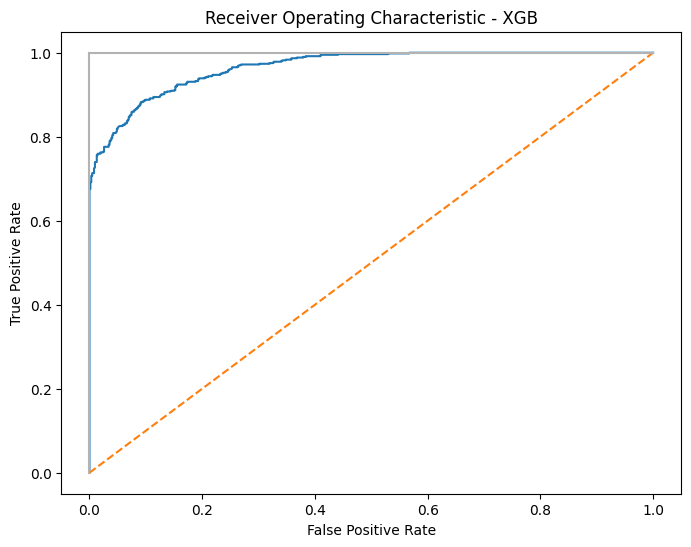

In [ ]:
false_positive_rate1, true_positive_rate1, threshold1 = metrics.roc_curve(y_test, y_score1)

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - XGB')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_score2 = modelo2.predict_proba(X_test)[:,1]
y_score2

print('roc_auc_score for Random Forest Classifier: ', metrics.roc_auc_score(y_test, y_score2))

roc_auc_score for Random Forest Classifier:  0.9653835986959273


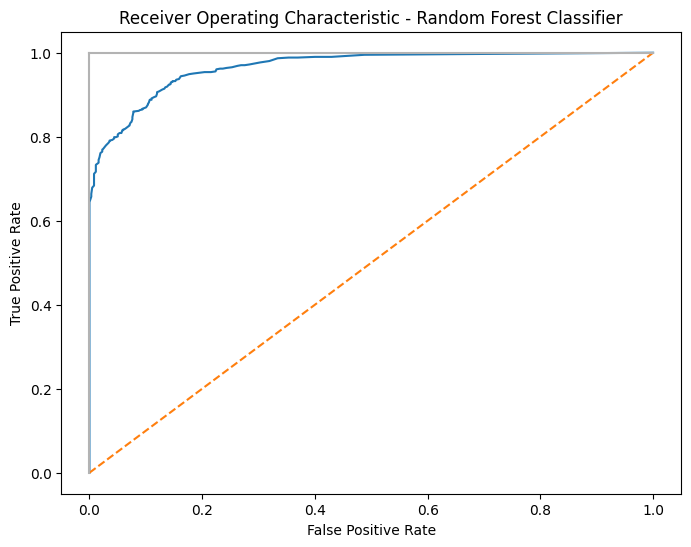

In [ ]:
false_positive_rate2, true_positive_rate2, threshold2 = metrics.roc_curve(y_test, y_score2)

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - Random Forest Classifier')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_score3 = modelo3.predict_proba(X_test)[:,1]
y_score3

print('roc_auc_score for Support Vector Machine: ', metrics.roc_auc_score(y_test, y_score3))

roc_auc_score for Support Vector Machine:  0.9503736793059898


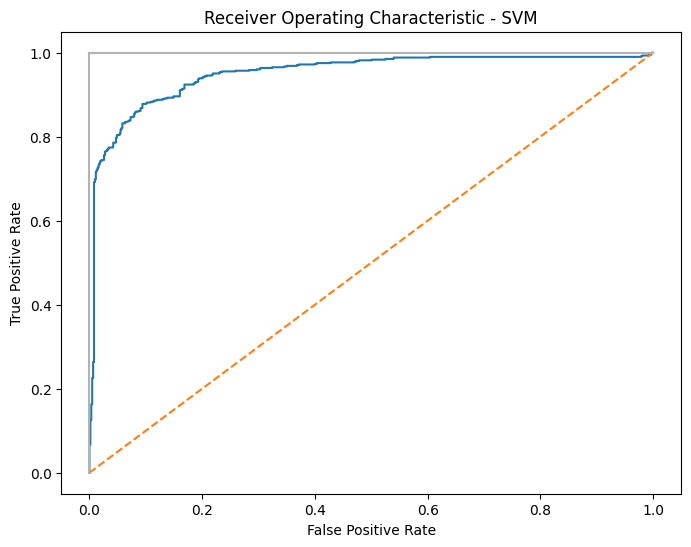

In [ ]:
false_positive_rate3, true_positive_rate3, threshold3 = metrics.roc_curve(y_test, y_score3)

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_score4 = modelo4.predict_proba(X_test)[:,1]
y_score4

print('roc_auc_score for KNeighborsClassifier: ', metrics.roc_auc_score(y_test, y_score4))

roc_auc_score for KNeighborsClassifier:  0.9464886961676178


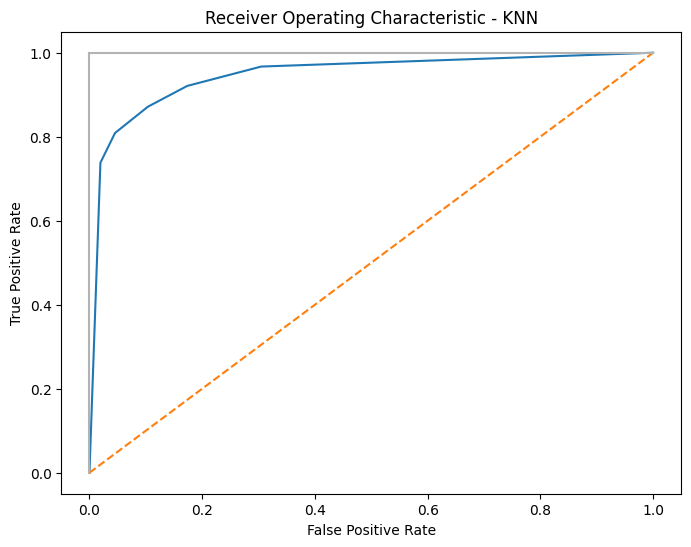

In [ ]:
false_positive_rate4, true_positive_rate4, threshold4 = metrics.roc_curve(y_test, y_score4)

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_score5 = modelo5.predict_proba(X_test)[:,1]
y_score5

print('roc_auc_score for Logistic Regression: ', metrics.roc_auc_score(y_test, y_score5))

roc_auc_score for Logistic Regression:  0.9542746829933861


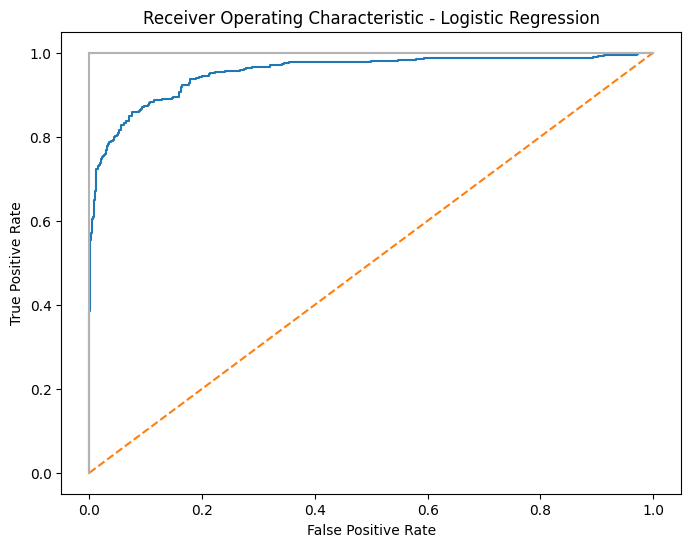

In [ ]:
false_positive_rate5, true_positive_rate5, threshold5 = metrics.roc_curve(y_test, y_score5)

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate5, true_positive_rate5)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_score6 = modelo6.predict_proba(X_test)[:,1]
y_score6

print('roc_auc_score for Naive Bayes Classifier: ', metrics.roc_auc_score(y_test, y_score6))

roc_auc_score for Naive Bayes Classifier:  0.9578499355172901


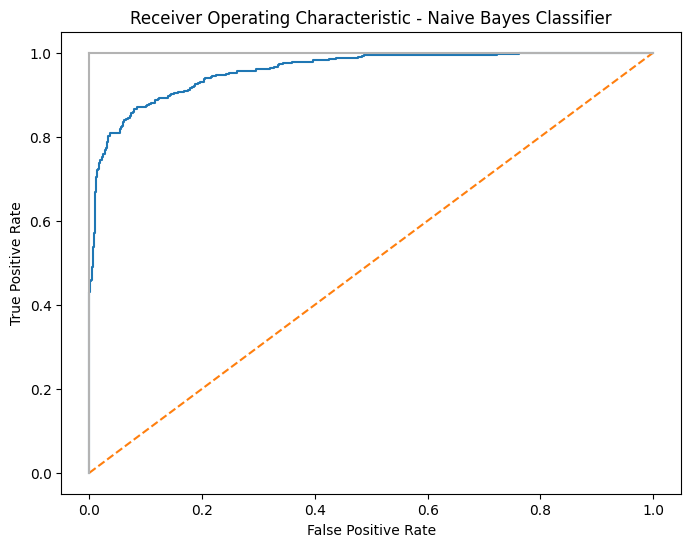

In [ ]:
false_positive_rate6, true_positive_rate6, threshold6 = metrics.roc_curve(y_test, y_score6)

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - Naive Bayes Classifier')
plt.plot(false_positive_rate6, true_positive_rate6)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Conclusiones 4

Lo que podemos ver es que, en esta situación, todos los clasificadores son muy buenos. Los mejores son el Extreme Gradient Boosting Classifier y el Random Forest Classifier. Pero el k Neighbours Classifier, el Support Vector Machine, la regresión logística y el Naive Bayes Classifier son también muy buenos.

Esto puede indicar que las variables son significativamente independientes, lineales y hay poca multicolinearidad.

No recomiendo el uso del K-Neighbours Classifier por tardar más tiempo en la inferencia. En caso de no encontrar problemas de Overfitting, usaré el Random Forest Classifier, caso contrario usaré el XGBoosting.

En mi opinión, la dinámica de fondo es que las muertes de diarrea están muy altamente correlacionadas a otras de las variables, como ser las enfermedades neonatales, etc. La correlación es tan alta que no importa el procedimiento que use genera un análisis muy bueno.

## Cross-validation

In [ ]:
# Instancio el metodo, aplico parametros
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
#Retorno el numero de splits
skf.get_n_splits(Xdim, z)

5

In [ ]:
#Genero los indices de cada division
#Indices para train y test
train, test = list(skf.split(Xdim, z))[0]

Xdim.iloc[test]

,pca0,Meningitis
1,4.201001,0.565809
5,4.874333,0.735834
8,4.712534,0.662065
12,4.751657,0.653897
38,-1.209108,-0.345756
...,...,...
6095,2.762441,0.054018
6096,2.618125,-0.051315
6107,2.973537,0.132265
6111,3.482541,0.390788


In [ ]:
modelo = xgb.XGBClassifier(random_state=1)

list_ac=[]
for i in range(0,skf.get_n_splits(Xdim, z)):
  # Calculo de indices
  train, test = list(skf.split(Xdim, z))[i]
  # Separar train y test
  X_train_n, y_train_n, X_test_n, y_test_n= Xdim.iloc[train], z[train], Xdim.iloc[test],z[test]
  # Ajustar el modelo
  modelo.fit(X_train_n, y_train_n)
  # Predicciones
  preds = modelo.predict(X_test_n)
  # Calculo del error
  accuracy= metrics.accuracy_score(y_true=y_test_n, y_pred= preds)
  print('Iteracion: ',i+1, ' Accuracy:', accuracy)
  list_ac.append(accuracy)
# Promedio de accuracy
print('Accuracy promedio:', np.mean(list_ac))

Iteracion:  1  Accuracy: 0.9044117647058824
Iteracion:  2  Accuracy: 0.8970588235294118
Iteracion:  3  Accuracy: 0.8872549019607843
Iteracion:  4  Accuracy: 0.880718954248366
Iteracion:  5  Accuracy: 0.9076797385620915
Accuracy promedio: 0.8954248366013072


In [ ]:
# Define the parameter grid for the Random Forest
param_dist_rf = {
    'n_estimators': randint(50, 200),  # Number of trees
    'max_depth': randint(3, 10),  # Maximum depth of each tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider when looking for the best split
}

In [ ]:
# Define the parameter grid for the XGBoosting
param_dist_xgb = {
    'n_estimators': randint(50, 200),  # Number of trees
    'learning_rate': uniform(0.01, 0.3),  # Learning rate
    'max_depth': randint(3, 10),  # Maximum depth of each tree
    'subsample': uniform(0.5, 0.5),  # Fraction of samples used for fitting each individual base learner
}

In [ ]:
# Create the XGBoosting object
xgb_classifier = xgb.XGBClassifier()

# Create RandomizedSearchCV object
random_search_xgb = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist_xgb, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

In [ ]:

# Fit RandomizedSearchCV to the training data
random_search_xgb.fit(X_train, y_train)

# Perform cross-validation with RandomizedSearchCV
cv_scores = cross_val_score(random_search_xgb.best_estimator_, X_train, y_train, cv=skf)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Best parameters and best score
print("Best Parameters:", random_search_xgb.best_params_)
print("Best Score:", random_search_xgb.best_score_)

Cross-validation scores: [0.89795918 0.91624106 0.8886619  0.8947906  0.90602656]
Mean CV accuracy: 0.9007358612495049
Best Parameters: {'learning_rate': 0.027425083650459835, 'max_depth': 7, 'n_estimators': 149, 'subsample': 0.5714334089609704}
Best Score: 0.9003276979841989


In [ ]:
# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=1)
# Create RandomizedSearchCV object
random_search_rf = RandomizedSearchCV(rf_classifier, param_distributions=param_dist_rf, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

In [ ]:
# Fit RandomizedSearchCV to the training data
random_search_rf.fit(X_train, y_train)

# Perform cross-validation with RandomizedSearchCV
cv_scores = cross_val_score(random_search_rf.best_estimator_, X_train, y_train, cv=skf)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Best parameters and best score
print("Best Parameters:", random_search_rf.best_params_)
print("Best Score:", random_search_rf.best_score_)

Cross-validation scores: [0.89795918 0.91930541 0.89581205 0.89172625 0.90194076]
Mean CV accuracy: 0.9013487315252965
Best Parameters: {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 54}
Best Score: 0.9015523962393945


## Análisis de overfitting

In [ ]:
Xdim=df_norm_4[['pca0','Meningitis']]

Se usan los hiperparámetros resultantes de la optimización

In [ ]:
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(Xdim,z,test_size=0.2, random_state=1)
# Creamos un modelo Random Forest con parametros por defect, limito el max_depth para evitar overfitting
#modelo = RandomForestClassifier(max_depth=2,random_state=1)
#Creamos un modelo GradientBoostingClassifier para evitar el opverfitting
modelo_rf = RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=3, min_samples_split=2, n_estimators=54)
modelo_rf.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds_rf = modelo_rf.predict(X_test)

<Figure size 1000x600 with 0 Axes>

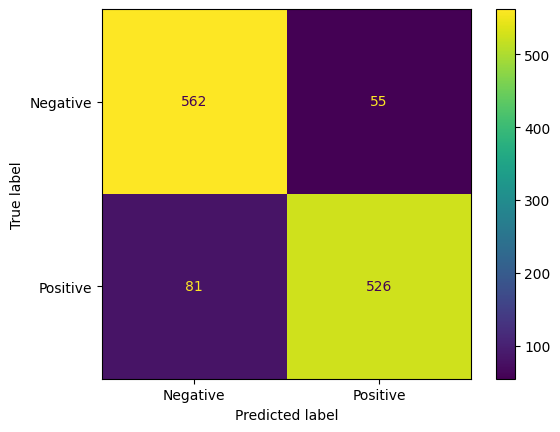

In [ ]:
plt.figure(figsize=(10,6))
metrics.ConfusionMatrixDisplay.from_estimator(modelo_rf, X_test, y_test, display_labels=['Negative', 'Positive'])

Se puede observar que con sólo 2 dimensiones, ya hay una accuracy del 89%. Tiene un poco de Overfitting.

In [ ]:
print(metrics.classification_report(y_test, preds_rf))

              precision    recall  f1-score   support

       False       0.87      0.91      0.89       617
        True       0.91      0.87      0.89       607

    accuracy                           0.89      1224
   macro avg       0.89      0.89      0.89      1224
weighted avg       0.89      0.89      0.89      1224



In [ ]:
preds_rf_over = modelo_rf.predict(X_train)
print(metrics.classification_report(y_train, preds_rf_over))

              precision    recall  f1-score   support

       False       0.92      0.95      0.94      2444
        True       0.95      0.92      0.93      2452

    accuracy                           0.93      4896
   macro avg       0.93      0.93      0.93      4896
weighted avg       0.93      0.93      0.93      4896



In [ ]:
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(Xdim,z,test_size=0.2, random_state=1)
# Creamos un modelo Random Forest con parametros por defect, limito el max_depth para evitar overfitting
#modelo = RandomForestClassifier(max_depth=2,random_state=1)
#Creamos un modelo GradientBoostingClassifier para evitar el opverfitting
modelo_xgb = xgb.XGBClassifier(learning_rate=0.027425083650459835, max_depth=7, n_estimators=149, subsample=0.5714334089609704)
modelo_xgb.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds_xgb = modelo_xgb.predict(X_test)

<Figure size 1000x600 with 0 Axes>

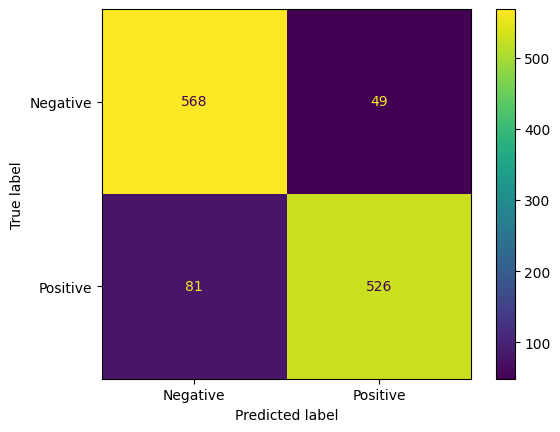

In [ ]:
plt.figure(figsize=(10,6))
metrics.ConfusionMatrixDisplay.from_estimator(modelo_xgb, X_test, y_test, display_labels=['Negative', 'Positive'])

Se puede ver que con el XGBoosting el Accuracy es de un 90%, con el mismo nivel de Overfitting.

In [ ]:
print(metrics.classification_report(y_test, preds_xgb))

              precision    recall  f1-score   support

       False       0.88      0.92      0.90       617
        True       0.91      0.87      0.89       607

    accuracy                           0.89      1224
   macro avg       0.89      0.89      0.89      1224
weighted avg       0.89      0.89      0.89      1224



In [ ]:
preds_xgb_over = modelo_xgb.predict(X_train)
print(metrics.classification_report(y_train, preds_xgb_over))

              precision    recall  f1-score   support

       False       0.92      0.94      0.93      2444
        True       0.94      0.91      0.93      2452

    accuracy                           0.93      4896
   macro avg       0.93      0.93      0.93      4896
weighted avg       0.93      0.93      0.93      4896



In [ ]:
Xdim=df_norm_4[['pca0','Meningitis','Maternal_Disorders']]

In [ ]:
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(Xdim,z,test_size=0.2, random_state=1)
modelo_3 = RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=3, min_samples_split=2, n_estimators=54)
modelo_3.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds_3 = modelo_3.predict(X_test)

<Figure size 1000x600 with 0 Axes>

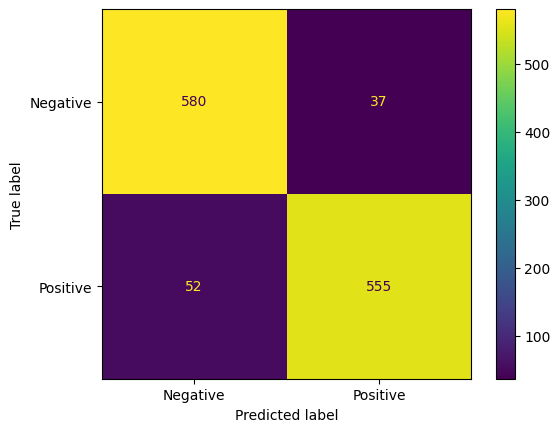

In [ ]:
plt.figure(figsize=(10,6))
metrics.ConfusionMatrixDisplay.from_estimator(modelo_3, X_test, y_test, display_labels=['Negative', 'Positive'])

Al sumar un tercer componente, la accuracy apenas crece de un 90% a un 93%. El overfitting también es bajo. La causa por la cual la precisión crece poco es que esta variable, la muerte por Diarrea es fácilmente predecible por pocas variables.

In [ ]:
print(metrics.classification_report(y_test, preds_3))

              precision    recall  f1-score   support

       False       0.92      0.94      0.93       617
        True       0.94      0.91      0.93       607

    accuracy                           0.93      1224
   macro avg       0.93      0.93      0.93      1224
weighted avg       0.93      0.93      0.93      1224



In [ ]:
preds_3_over = modelo_3.predict(X_train)
print(metrics.classification_report(y_train, preds_3_over))

              precision    recall  f1-score   support

       False       0.95      0.96      0.96      2444
        True       0.96      0.95      0.96      2452

    accuracy                           0.96      4896
   macro avg       0.96      0.96      0.96      4896
weighted avg       0.96      0.96      0.96      4896



## Conclusiones 4

Podemos ver, entonces, que la precisión, es extremadamente alta. Es decir, esta es del 89% con dos variables. Ni el Random Forest ni el XGBoosting overfittea, con lo cual recomendamos usar el Random Forest.

En general, la precisión es muy alta con muy pocas variables, y varía muy poco. Esto señala que la mortalidad por diarrea está en extremo correlacionada a la primer variable del PCA.


## Regresión

Por último, utilizo una regresión OLS para entender los resultados.

Se puede ver que, con dos variables, el R2 es muy alto, de 82% (tan solo la primer variable ya contribuye a un 77%)

In [ ]:
data_inclusivo = pd.concat([df_norm_4, y], axis=1)

In [ ]:
model_ols_1 = 'Diarrheal_Diseases~pca0'
lm = sm.ols(formula = model_ols_1, data = data_inclusivo).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:     Diarrheal_Diseases   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                 2.071e+04
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:39:18   Log-Likelihood:                 14399.
No. Observations:                6120   AIC:                        -2.879e+04
Df Residuals:                    6118   BIC:                        -2.878e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0340      0.000    115.540      0.0

In [ ]:
model_ols_2 = 'Diarrheal_Diseases~pca0+Meningitis'
lm    = sm.ols(formula = model_ols_2, data = data_inclusivo).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:     Diarrheal_Diseases   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                 1.396e+04
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:39:18   Log-Likelihood:                 15127.
No. Observations:                6120   AIC:                        -3.025e+04
Df Residuals:                    6117   BIC:                        -3.023e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0340      0.000    130.125      0.0

Ahora, también me gustaría hacer un análisis más detallado. Aquí uso la matrix entera.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_norm_4,y,test_size=0.2, random_state=1)

# Fit SVR models with different kernels
svr_linear = SVR(kernel='linear')
svr_rbf = SVR(kernel='rbf')

svr_linear.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)

data_inclusivo_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
# Fit OLS regression model
formula_ols = "Diarrheal_Diseases ~ " + " + ".join(X_test.columns)
model_ols = sm.ols(formula=formula_ols,data=data_inclusivo_test).fit()

# Make predictions using each model
preds_svr_linear = svr_linear.predict(X_test)
preds_svr_rbf = svr_rbf.predict(X_test)
preds_ols = model_ols.predict(X_test)

# Calculate RMSE for each model
rmse_svr_linear = np.sqrt(metrics.mean_squared_error(y_test, preds_svr_linear))
rmse_svr_rbf = np.sqrt(metrics.mean_squared_error(y_test, preds_svr_rbf))
rmse_ols = np.sqrt(metrics.mean_squared_error(y_test, preds_ols))

# Compare RMSE values
print("RMSE for SVR (linear kernel):", rmse_svr_linear)
print("RMSE for SVR (rbf kernel):", rmse_svr_rbf)
print("RMSE for OLS:", rmse_ols)

RMSE for SVR (linear kernel): 0.07863039600882502
RMSE for SVR (rbf kernel): 0.08239822782861138
RMSE for OLS: 0.017145315231916307


## Conclusiones 5

Como se puede ver, el método OLS tiene un RMSE extremadamente bajo, y muchísimo más chico que el SVR (rbf kernel) o el SVR (linear kernel). Esto es llamativo, y señala que el sistema es significativamente lineal. Dado este resultado recomiendo usar el modelo OLS.

# **2. Análisis de mortalidad infantil**



## Preparación de los datos

In [ ]:
# Define Kaggle API credentials
kaggle_data = {"username": "alangivr", "key": "a64907557fbd6a4d2870c478a394b966"}

# Check if the directory exists, and create it if not
if not os.path.exists('/root/.kaggle/'):
    os.makedirs('/root/.kaggle/')

# Write credentials to kaggle.json
with open('kaggle.json', 'w') as f:
    json.dump(kaggle_data, f)

shutil.move('kaggle.json', '/root/.kaggle/')

'/root/.kaggle/kaggle.json'

In [ ]:
# Use Kaggle API to download the dataset
!kaggle datasets download -d joebeachcapital/health-nutrition-and-population-statistics

%cd /content
!unzip health-nutrition-and-population-statistics.zip

 31% 5.00M/16.2M [00:00<00:00, 35.9MB/s]
100% 16.2M/16.2M [00:00<00:00, 71.9MB/s]
/content
Archive:  health-nutrition-and-population-statistics.zip
  inflating: 0970cac9-5b65-4094-8e31-293818251f59_Data.csv  
  inflating: 0970cac9-5b65-4094-8e31-293818251f59_Series - Metadata.csv  


In [ ]:
df2 = pd.read_csv("/content/0970cac9-5b65-4094-8e31-293818251f59_Data.csv")

In [ ]:
df2

,Series Name,Series Code,Country Name,Country Code,2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,"Prevalence of stunting, height for age (% of c...",SH.STA.STNT.ZS,Afghanistan,AFG,..,59.3,..,..,..,..,..,..,..,..,40.4,..,..,..,..,38.2,..,..,..,..
1,"Prevalence of stunting, height for age (% of c...",SH.STA.STNT.ZS,Albania,ALB,..,..,26.7,..,..,..,23.2,..,..,..,..,..,..,..,11.3,..,..,..,..,..
2,"Prevalence of stunting, height for age (% of c...",SH.STA.STNT.ZS,Algeria,DZA,..,..,..,15.4,..,..,..,..,..,11.7,..,..,..,..,..,..,9.8,..,..,..
3,"Prevalence of stunting, height for age (% of c...",SH.STA.STNT.ZS,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
4,"Prevalence of stunting, height for age (% of c...",SH.STA.STNT.ZS,Andorra,AND,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124225,Data from database: Health Nutrition and Popul...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2.shape

(124227, 24)

In [ ]:
#####Reescribo la matriz con el Pivot para tener los países y años en el index, y todos los indicadores en las columnas.

df2r=df2.pivot_table(index='Series Code',columns='Country Code',values=df2.iloc[:, 5:25], aggfunc='first')
df2r=df2r.T
pd.set_option('display.max_columns', 467)
df2r

Series Code                HD.HCI.OVRL HD.HCI.OVRL.FE HD.HCI.OVRL.LB  \
              Country Code                                             
2004 [YR2004] ABW                   ..             ..             ..   
              AFE                   ..             ..             ..   
              AFG                   ..             ..             ..   
              AFW                   ..             ..             ..   
              AGO                   ..             ..             ..   
...                                ...            ...            ...   
2022 [YR2022] XKX                   ..             ..             ..   
              YEM                   ..             ..             ..   
              ZAF                   ..             ..             ..   
              ZMB                   ..             ..             ..   
              ZWE                   ..             ..             ..   

Series Code                HD.HCI.OVRL.LB.FE HD.HCI.OVRL.LB.MA HD.HCI.OVRL.MA  \
              Country Code                                                      
2004 [YR2004] ABW                         ..                ..             ..   
              AFE                         ..                ..             ..   
              AFG                         ..                ..             ..   
              AFW                         ..                ..             ..   
              AGO                         ..                ..             ..   
...                                      ...               ...            ...   
2022 [YR2022] XKX                         ..                ..             ..   
              YEM                         ..                ..             ..   
              ZAF                         ..                ..             ..   
              ZMB                         ..                ..             ..   
              ZWE                         ..                ..             ..   

Series Code                HD.HCI.OVRL.UB HD.HCI.OVRL.UB.FE HD.HCI.OVRL.UB.MA  \
              Country Code                                                      
2004 [YR2004] ABW                      ..                ..                ..   
              AFE                      ..                ..                ..   
              AFG                      ..                ..                ..   
              AFW                      ..                ..                ..   
              AGO                      ..                ..                ..   
...                                   ...               ...               ...   
2022 [YR2022] XKX                      ..                ..                ..   
              YEM                      ..                ..                ..   
              ZAF                      ..                ..                ..   
              ZMB                      ..                ..                ..   
              ZWE                      ..                ..                ..   

Series Code                   NY.GNP.PCAP.CD SE.ADT.1524.LT.FM.ZS  \
              Country Code                                          
2004 [YR2004] ABW                      24010                   ..   
              AFE           813.904450896533    0.881839990615845   
              AFG                         ..                   ..   
              AFW           706.669083581704    0.768149971961975   
              AGO                       1010                   ..   
...                                      ...                  ...   
2022 [YR2022] XKX                       5590                   ..   
              YEM                         ..                   ..   
              ZAF                       6780                   ..   
              ZMB                       1170                   ..   
              ZWE                       1500                   ..   

Series Code                SE.ADT.1524.LT.MA.ZS SE.ADT.15

In [ ]:
df2r.shape

(5054, 467)

In [ ]:
####Esta es la forma de saber qué significa un código
df2.loc[df2['Series Code'] == 'SP.POP.TOTL.FE.IN']

,Series Name,Series Code,Country Name,Country Code,2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
89908,"Population, female",SP.POP.TOTL.FE.IN,Afghanistan,AFG,11247647,11690825,12109086,12614497,12835340,13088192,13557331,13949295,14468875,15067373,15594637,16172321,16682054,17115346,17614722,18136922,18679089,19279930,19844584,20362329
89909,"Population, female",SP.POP.TOTL.FE.IN,Albania,ALB,1531532,1523393,1513578,1501918,1488396,1474838,1462978,1454108,1449024,1445914,1442931,1439863,1435812,1433925,1433238,1430495,1425364,1418585,1407212,1391085
89910,"Population, female",SP.POP.TOTL.FE.IN,Algeria,DZA,15709725,15932047,16150274,16384158,16653361,16941031,17249096,17573708,17911362,18264572,18629532,19004433,19390923,19783015,20175233,20564404,20948465,21318767,21680725,22040987
89911,"Population, female",SP.POP.TOTL.FE.IN,American Samoa,ASM,28521,28392,28230,28044,27842,27626,27406,27189,26951,26678,26369,26017,25629,25208,24762,24290,23786,23268,22746,22399
89912,"Population, female",SP.POP.TOTL.FE.IN,Andorra,AND,35478,36852,38147,38392,37633,36864,36065,35212,34895,35127,35324,35473,35557,35913,36456,36943,37502,38084,38673,39038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90169,"Population, female",SP.POP.TOTL.FE.IN,Sub-Saharan Africa,SSF,366538352,376361661,386526735,397032885,407916359,419164461,430739177,442646200,454832692,467301884,480125005,493252660,506709770,520367834,534216359,548412951,562935827,577767458,592668801,607646914
90170,"Population, female",SP.POP.TOTL.FE.IN,Sub-Saharan Africa (excluding high income),SSA,366497419,376320998,386485991,396991396,407874772,419122058,430696739,442602713,454790498,467259431,480081903,493208989,506665195,520322735,534170783,548367017,562889571,577720860,592621843,607599532
90171,"Population, female",SP.POP.TOTL.FE.IN,Sub-Saharan Africa (IDA & IBRD countries),TSS,366538352,376361661,386526735,397032885,407916359,419164461,430739177,442646200,454832692,467301884,480125005,493252660,506709770,520367834,534216359,548412951,562935827,577767458,592668801,607646914
90172,"Population, female",SP.POP.TOTL.FE.IN,Upper middle income,UMC,1213074533,1222691690,1232318961,1241480353,1250254807,1259549301,1269077057,1278338766,1288213242,1299339462,1310784578,1321951909,1332694084,1343062791,1353443659,1362924416,1371484447,1378737632,1384210636,1388879475


In [ ]:
df2r.replace('..', np.nan, inplace=True)
df2r = df2r.apply(lambda col: pd.to_numeric(col.replace('<NA>', np.nan), errors='coerce'))

In [ ]:
percent_missing = df2r.isnull().sum() * 100 / len(df2r)
missing_value_df = pd.DataFrame({'Columnas': df2r.columns,
                                 'Porcentaje_Missing': percent_missing})
missing_value_df

,Columnas,Porcentaje_Missing
Series Code,,
HD.HCI.OVRL,HD.HCI.OVRL,88.108429
HD.HCI.OVRL.FE,HD.HCI.OVRL.FE,89.592402
HD.HCI.OVRL.LB,HD.HCI.OVRL.LB,88.108429
HD.HCI.OVRL.LB.FE,HD.HCI.OVRL.LB.FE,89.592402
HD.HCI.OVRL.LB.MA,HD.HCI.OVRL.LB.MA,89.612188
...,...,...
SP.RUR.TOTL.ZS,SP.RUR.TOTL.ZS,2.631579
SP.URB.GROW,SP.URB.GROW,2.631579
SP.URB.TOTL,SP.URB.TOTL,2.631579


In [ ]:
df2u=df2r.copy()
df2u.reset_index(drop=True, inplace=True)
percent_missing = df2u.isnull().sum(axis=1) * 100 / len(df2u.index)
missing_value_df_row = pd.DataFrame({'Filas': df2u.index,
                                      'Porcentaje_Missing': percent_missing})
missing_value_df_row

,Filas,Porcentaje_Missing
0,0,5.480807
1,1,4.036407
2,2,2.671152
3,3,3.897903
4,4,3.027305
...,...,...
5049,5049,6.311832
5050,5050,6.074397
5051,5051,6.054610
5052,5052,6.054610


In [ ]:
missing_value_df_f=missing_value_df[missing_value_df['Porcentaje_Missing']<=20]
lista_variables=list(missing_value_df_f.index)
df_x=df2r.loc[:, df2r.columns.isin(lista_variables)]
df_x.shape

(5054, 226)

In [ ]:
df_filled=df_x.fillna(df_x.median(numeric_only=True))
df_filled

Series Code                 NY.GNP.PCAP.CD  SH.DTH.0509  SH.DTH.0509.FE  \
              Country Code                                                
2004 [YR2004] ABW             24010.000000        436.0           191.0   
              AFE               813.904451     203113.0         98761.0   
              AFG              5170.000000       4321.0          1873.0   
              AFW               706.669084     159957.0         76742.0   
              AGO              1010.000000      14120.0          6783.0   
...                                    ...          ...             ...   
2022 [YR2022] XKX              5590.000000        436.0           191.0   
              YEM              5170.000000        436.0           191.0   
              ZAF              6780.000000        436.0           191.0   
              ZMB              1170.000000        436.0           191.0   
              ZWE              1500.000000        436.0           191.0   

Series Code                 SH.DTH.0509.MA  SH.DTH.1014  SH.DTH.1014.FE  \
              Country Code                                                
2004 [YR2004] ABW                    249.0        406.0           166.0   
              AFE                 104352.0      93606.0         45666.0   
              AFG                   2448.0       2418.0           983.0   
              AFW                  83215.0      70696.0         34731.0   
              AGO                   7337.0       6178.0          3153.0   
...                                    ...          ...             ...   
2022 [YR2022] XKX                    249.0        406.0           166.0   
              YEM                    249.0        406.0           166.0   
              ZAF                    249.0        406.0           166.0   
              ZMB                    249.0        406.0           166.0   
              ZWE                    249.0        406.0           166.0   

Series Code                 SH.DTH.1014.MA  SH.DTH.1019  SH.DTH.1019.FE  \
              Country Code                                                
2004 [YR2004] ABW                    234.5       1292.0           456.0   
              AFE                  47940.0     240627.0        117667.0   
              AFG                   1435.0       5946.0          2651.0   
              AFW                  35965.0     150136.0         74668.0   
              AGO                   3025.0      15484.0          7730.0   
...                                    ...          ...             ...   
2022 [YR2022] XKX                    234.5       1292.0           456.0   
              YEM                    234.5       1292.0           456.0   
              ZAF                    234.5       1292.0           456.0   
              ZMB                    234.5       1292.0           456.0   
              ZWE                    234.5       1292.0           456.0   

Series Code                 SH.DTH.1019.MA  SH.DTH.1519  SH.DTH.1519.FE  \
              Country Code                                                
2004 [YR2004] ABW                    859.5        929.5           288.5   
              AFE                 122960.0     147021.0         72001.0   
              AFG                   3295.0       3528.0          1668.0   
              AFW                  75468.0      79440.0         39937.0   
              AGO                   7754.0       9306.0          4577.0   
...                                    ...          ...             ...   
2022 [YR2022] XKX                    859.5        929.5           288.5   
              YEM                    859.5        929.5           288.5   
              ZAF                    859.5        929.5           288.5   
              ZMB                    859.5        929.5           288.5   
              ZWE                    859.5        929.5           288.5   

Series Code                 SH.DTH.1519.MA  SH.DTH.2024  SH.DTH.2024.FE  \
              Country

In [ ]:
#####Separo el dataframe en uno ligado a características poblacionales y otro con el resto.

df2pop=df_filled.iloc[:,73:219]
df2n=pd.concat([df_filled.iloc[:, 0:72], df_filled.iloc[:, 220:]], axis=1)

In [ ]:
#Esta columna es importante para normalizar: la población de cada país.

population=df2pop['SP.POP.TOTL']
#print(population)

In [ ]:
df2n.shape

(5054, 78)

In [ ]:
df2n.describe()

Series Code,NY.GNP.PCAP.CD,SH.DTH.0509,SH.DTH.0509.FE,SH.DTH.0509.MA,SH.DTH.1014,SH.DTH.1014.FE,SH.DTH.1014.MA,SH.DTH.1019,SH.DTH.1019.FE,SH.DTH.1019.MA,SH.DTH.1519,SH.DTH.1519.FE,SH.DTH.1519.MA,SH.DTH.2024,SH.DTH.2024.FE,SH.DTH.2024.MA,SH.DTH.IMRT,SH.DTH.IMRT.FE,SH.DTH.IMRT.MA,SH.DTH.MORT,SH.DTH.MORT.FE,SH.DTH.MORT.MA,SH.DTH.NMRT,SH.DTH.STLB,SH.DYN.0509,SH.DYN.0509.FE,SH.DYN.0509.MA,SH.DYN.1014,SH.DYN.1014.FE,SH.DYN.1014.MA,SH.DYN.1019,SH.DYN.1019.FE,SH.DYN.1019.MA,SH.DYN.1519,SH.DYN.1519.FE,SH.DYN.1519.MA,SH.DYN.2024,SH.DYN.2024.FE,SH.DYN.2024.MA,SH.DYN.MORT,SH.DYN.MORT.FE,SH.DYN.MORT.MA,SH.DYN.NMRT,SH.DYN.STLB,SH.H2O.BASW.ZS,SH.IMM.IDPT,SH.IMM.MEAS,SH.IMM.POL3,SH.STA.BASS.ZS,SH.STA.ODFC.ZS,SH.TBS.INCD,SH.TBS.MORT,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS,SM.POP.NETM,SP.ADO.TFRT,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.IMRT.FE.IN,SP.DYN.IMRT.IN,SP.DYN.IMRT.MA.IN,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,SP.DYN.TFRT.IN,SP.DYN.TO65.FE.ZS,SP.DYN.TO65.MA.ZS,SP.RUR.TOTL,SP.RUR.TOTL.ZG,SP.RUR.TOTL.ZS,SP.URB.GROW,SP.URB.TOTL,SP.URB.TOTL.IN.ZS
count,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5.054000e+03,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5.054000e+03,5.054000e+03,5.054000e+03,5.054000e+03,5.054000e+03,5.054000e+03,5.054000e+03,5.054000e+03,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5.054000e+03,5054.000000,5054.000000,5054.000000,5.054000e+03,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5.054000e+03,5054.000000,5054.000000,5054.000000,5.054000e+03,5054.000000
mean,12450.839306,24277.525722,11244.138702,13033.967946,15390.902849,6892.421844,8497.691729,4.014090e+04,17010.423823,23133.896320,24756.318560,10117.790265,14637.584290,30653.181440,11982.330629,18669.109220,1.894238e+05,8.518220e+04,1.042446e+05,2.627591e+05,1.211789e+05,1.415823e+05,1.135301e+05,8.827046e+04,3.800502,3.547053,4.057263,2.807023,2.533057,3.057225,8.078812,6.634162,9.411798,5.279204,4.121077,6.351817,7.317167,5.485115,9.016316,34.209234,31.529238,36.757091,14.776562,11.911944,87.425044,87.898856,87.007267,87.822363,75.515956,7.973370,110.364361,12.561727,41.226331,1.169199e+08,8.746552,7.018605,7.559081,-4.881340e+04,50.454020,137.462661,210.362839,20.976442,7.996815,22.796348,25.240405,27.559214,73.672124,70.973969,68.392782,2.770132,78.593113,68.855803,1.281843e+08,0.288268,41.489773,1.972529,1.351974e+08,58.510227
std,17847.994239,86971.919370,40564.552686,46437.941838,54184.995081,24433.390960,29798.676872,1.391154e+05,60092.753672,79301.582698,85057.263388,35693.958803,49625.476608,104597.214115,42200.285417,63017.503212,6.803632e+05,3.075235e+05,3.729100e+05,9.466279e+05,4.391703e+05,5.075818e+05,4.122595e+05,3.153520e+05,4.656603,4.610341,4.709548,2.646110,2.716085,2.596760,6.327416,6.614289,6.217023,3.874660,4.101295,3.857092,5.361493,5.930176,5.276960,33.904930,31.947287,35.794517,10.987561,7.580790,16.086222,12.309302,12.683032,12.200513,26.575310,14.073202,163.965301,19.428731,8.413624,3.900891e+08,6.437556,4.631840,5.014500,6.948582e+05,39.462606,94.717847,102.194971,10.109232,2.775669,19.638163,21.554160,23.401094,8.319712,7.910637,7.636266,1.361536,13.348408,13.667463,4.455529e+08,1.653140,22.757056,1.855502,4.420491e+08,22.757056
min,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0

In [ ]:
######Estas son todas las categorías que puedo analizar
print(df2n.columns.values)

['NY.GNP.PCAP.CD' 'SH.DTH.0509' 'SH.DTH.0509.FE' 'SH.DTH.0509.MA'
 'SH.DTH.1014' 'SH.DTH.1014.FE' 'SH.DTH.1014.MA' 'SH.DTH.1019'
 'SH.DTH.1019.FE' 'SH.DTH.1019.MA' 'SH.DTH.1519' 'SH.DTH.1519.FE'
 'SH.DTH.1519.MA' 'SH.DTH.2024' 'SH.DTH.2024.FE' 'SH.DTH.2024.MA'
 'SH.DTH.IMRT' 'SH.DTH.IMRT.FE' 'SH.DTH.IMRT.MA' 'SH.DTH.MORT'
 'SH.DTH.MORT.FE' 'SH.DTH.MORT.MA' 'SH.DTH.NMRT' 'SH.DTH.STLB'
 'SH.DYN.0509' 'SH.DYN.0509.FE' 'SH.DYN.0509.MA' 'SH.DYN.1014'
 'SH.DYN.1014.FE' 'SH.DYN.1014.MA' 'SH.DYN.1019' 'SH.DYN.1019.FE'
 'SH.DYN.1019.MA' 'SH.DYN.1519' 'SH.DYN.1519.FE' 'SH.DYN.1519.MA'
 'SH.DYN.2024' 'SH.DYN.2024.FE' 'SH.DYN.2024.MA' 'SH.DYN.MORT'
 'SH.DYN.MORT.FE' 'SH.DYN.MORT.MA' 'SH.DYN.NMRT' 'SH.DYN.STLB'
 'SH.H2O.BASW.ZS' 'SH.IMM.IDPT' 'SH.IMM.MEAS' 'SH.IMM.POL3'
 'SH.STA.BASS.ZS' 'SH.STA.ODFC.ZS' 'SH.TBS.INCD' 'SH.TBS.MORT'
 'SL.TLF.TOTL.FE.ZS' 'SL.TLF.TOTL.IN' 'SL.UEM.TOTL.FE.ZS'
 'SL.UEM.TOTL.MA.ZS' 'SL.UEM.TOTL.ZS' 'SM.POP.NETM' 'SP.ADO.TFRT'
 'SP.DYN.AMRT.FE' 'SP.DYN.AMRT.MA' 'SP.DYN.CB

In [ ]:
#####De esta manera, puedo ver el significado de las 78 columnas que son relevantes en el df_filled

filtered_df = df2[df2['Series Code'].isin(df2n.columns.values)]
result_df = filtered_df[['Series Name','Series Code']].drop_duplicates()
pd.set_option('display.max_rows', None)
print(result_df)

                                              Series Name        Series Code
266     Adolescent fertility rate (births per 1,000 wo...        SP.ADO.TFRT
17822                Birth rate, crude (per 1,000 people)     SP.DYN.CBRT.IN
27132                Death rate, crude (per 1,000 people)     SP.DYN.CDRT.IN
32452            Fertility rate, total (births per woman)     SP.DYN.TFRT.IN
32718          GNI per capita, Atlas method (current US$)     NY.GNP.PCAP.CD
35910   Immunization, DPT (% of children ages 12-23 mo...        SH.IMM.IDPT
36708   Immunization, measles (% of children ages 12-2...        SH.IMM.MEAS
37240     Immunization, Pol3 (% of one-year-old children)        SH.IMM.POL3
38836      Incidence of tuberculosis (per 100,000 people)        SH.TBS.INCD
39634        Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS
39900                                  Labor force, total     SL.TLF.TOTL.IN
40166            Life expectancy at birth, female (years)  SP.DYN.LE00.FE.IN

## Data Engineering

In [ ]:
pd.reset_option('display.max_rows')
####Ahora tengo que dividir algunas columnas, pero *sólo algunas* por la población total. Otras tengo que dividir por la población en un rango de edad. Otras columnas, no las tengo que dividir por nada.

##elimino redundancias
df2nn = df2n.drop(['SH.DTH.IMRT','SH.DTH.MORT','SH.DTH.MORT.FE','SH.DTH.MORT.MA','SH.DTH.1014','SH.DTH.1014.FE','SH.DTH.1014.MA','SH.DTH.1019','SH.DTH.1019.FE','SH.DTH.1019.MA','SH.DTH.1519','SH.DTH.1519.FE','SH.DTH.1519.MA','SH.DTH.0509','SH.DTH.0509.FE','SH.DTH.0509.MA','SH.DTH.2024','SH.DTH.2024.FE','SH.DTH.2024.MA','SP.RUR.TOTL','SH.DTH.STLB','SP.URB.TOTL'], axis=1)


#df2pop=df2pop.astype(float)
#print(df2pop['SP.POP.TOTL'].dtype)
#print(df_filledd[['SM.POP.NETM']]/df2pop[['SP.POP.TOTL']])

df2nn[['SM.POP.NETM','SL.TLF.TOTL.IN','SH.DTH.IMRT.FE']] = df2nn[['SM.POP.NETM','SL.TLF.TOTL.IN','SH.DTH.IMRT.FE']] / df2pop[['SP.POP.TOTL','SP.POP.TOTL','SP.POP.0004.FE.5Y']].values

#para el género sólo me voy a quedar con valores relativos
df2nn[['SH.DTH.IMRT.FE','SP.DYN.IMRT.FE.IN','SH.DYN.MORT.FE','SH.DYN.1014.FE','SH.DYN.1019.FE','SH.DYN.1519.FE','SH.DYN.0509.FE','SH.DYN.2024.FE']]=df2nn[['SH.DTH.IMRT.FE','SP.DYN.IMRT.FE.IN','SH.DYN.MORT.FE','SH.DYN.1014.FE','SH.DYN.1019.FE','SH.DYN.1519.FE','SH.DYN.0509.FE','SH.DYN.2024.FE']] / df2nn[['SH.DTH.IMRT.MA','SP.DYN.IMRT.MA.IN','SH.DYN.MORT.MA','SH.DYN.1014.MA','SH.DYN.1019.MA','SH.DYN.1519.MA','SH.DYN.0509.MA','SH.DYN.2024.MA']].values
df2nn = df2nn.drop(['SH.DTH.IMRT.MA','SP.DYN.IMRT.MA.IN','SH.DYN.MORT.MA','SH.DYN.1014.MA','SH.DYN.1019.MA','SH.DYN.1519.MA','SH.DYN.0509.MA','SH.DYN.2024.MA'], axis=1)

In [ ]:
df2nn.describe()

Series Code,NY.GNP.PCAP.CD,SH.DTH.IMRT.FE,SH.DTH.NMRT,SH.DYN.0509,SH.DYN.0509.FE,SH.DYN.1014,SH.DYN.1014.FE,SH.DYN.1019,SH.DYN.1019.FE,SH.DYN.1519,SH.DYN.1519.FE,SH.DYN.2024,SH.DYN.2024.FE,SH.DYN.MORT,SH.DYN.MORT.FE,SH.DYN.NMRT,SH.DYN.STLB,SH.H2O.BASW.ZS,SH.IMM.IDPT,SH.IMM.MEAS,SH.IMM.POL3,SH.STA.BASS.ZS,SH.STA.ODFC.ZS,SH.TBS.INCD,SH.TBS.MORT,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS,SM.POP.NETM,SP.ADO.TFRT,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.IMRT.FE.IN,SP.DYN.IMRT.IN,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,SP.DYN.TFRT.IN,SP.DYN.TO65.FE.ZS,SP.DYN.TO65.MA.ZS,SP.RUR.TOTL.ZG,SP.RUR.TOTL.ZS,SP.URB.GROW,SP.URB.TOTL.IN.ZS
count,5054.000000,5030.000000,5.054000e+03,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000,5054.000000
mean,12450.839306,inf,1.135301e+05,3.800502,0.800016,2.807023,0.752968,8.078812,0.617711,5.279204,0.569297,7.317167,0.521105,34.209234,0.839121,14.776562,11.911944,87.425044,87.898856,87.007267,87.822363,75.515956,7.973370,110.364361,12.561727,41.226331,14.398699,8.746552,7.018605,7.559081,-0.000334,50.454020,137.462661,210.362839,20.976442,7.996815,0.825408,25.240405,73.672124,70.973969,68.392782,2.770132,78.593113,68.855803,0.288268,41.489773,1.972529,58.510227
std,17847.994239,NaN,4.122595e+05,4.656603,0.098627,2.646110,0.126241,6.327416,0.181861,3.874660,0.207806,5.361493,0.254223,33.904930,0.042816,10.987561,7.580790,16.086222,12.309302,12.683032,12.200513,26.575310,14.073202,163.965301,19.428731,8.413624,53.229685,6.437556,4.631840,5.014500,0.012782,39.462606,94.717847,102.194971,10.109232,2.775669,0.036337,21.554160,8.319712,7.910637,7.636266,1.361536,13.348408,13.667463,1.653140,22.757056,1.855502,22.757056
min,120.000000,0.000000,0.000000e+00,0.200000,0.550000,0.200000,0.500000,1.100000,0.239130,0.800000,0.161290,1.000000,0.081365,1.700000,0.629213,0.700000,1.500000,24.525267,19.000000,16.000000,0.000000,4.071684,0.000000,0.000000,0.000000,7.786072,0.035259,0.172000,0.050000,0.095000,-0.139432,0.876000,22.070000,42.594000,5.000000,0.795000,0.621622,1.000000,43.356000,42.125000,40.689000,0.772000,19.612394,13.926363,-14.725552,0.000000,-13.956487,9.139000
25%,2009.616460,0.060214,3.410000e+02,1.100000,0.736842,1.200000,0.666667,3.900000,0.508663,2.600000,0.444444,3.600000,0.364746,10.900000,0.811715,5.800000,6.000000,84.663683,85.000000,83.070438,84.000000,62.977951,0.010664,19.000000,1.500000,39.372575,0.378174,4.731750,4.335138,4.462987,-0.002573,19.720000,74.007500,139.459500,12.560366,6.308250,0.807882,9.300000,68.889250,66.466250,63.969000,1.761455,71.770935,60.066778,-0.556442,22.871886,0.707850,40.732802
50%,5170.000000,0.086907,2.550500e+03,1.805517,0.759570,1.900000,0.700100,6.200000,0.539216,4.200000,0.477462,5.800000,0.401742,21.700000,0.832082,11.800000,10.400000,94.150000,92.000000,91.497848,92.000000,85.977860,1.280564,50.000000,4.300000,43.963699,0.454233,6.844000,5.925370,6.360000,-0.000325,40.952000,108.622000,195.808728,18.515123,7.600000,0.819843,18.400000,75.703000,72.457220,69.290052,2.330000,82.623169,70.447232,0.335191,41.912603,1.841811,58.087397
75%,12830.000000,0.131006,1.742800e+04,4.442359,0.867439,3.200000,0.833333,9.704259,0.725000,6.300000,0.665202,8.698116,0.633260,45.900000,0.861841,22.500000,16.300000,98.718267,96.000000,95.000000,96.000000,96.585255,9.500000,130.750000,14.000000,46.316806,0.523371,10.605250,8.281750,9.030500,0.001603,70.686000,169.095750,265.912750,27.376000,9.418060,0.843137,35.400000,79.550500,76.538

## EDA

Acá comienza el EDA. Esto me ayudó para descartar algunos elementos que me había olvidado.

<Axes: xlabel='Series Code', ylabel='Series Code'>

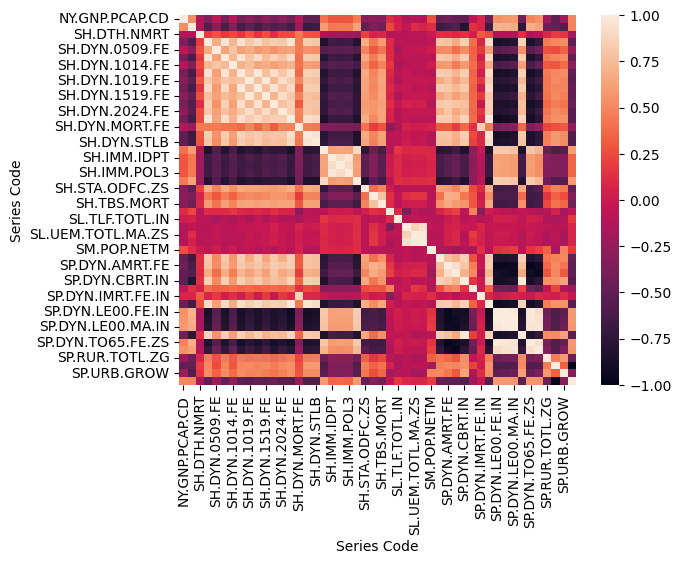

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df2nn.corr()

# Display the correlation matrix
sns.heatmap(correlation_matrix)

Hay muchísimas variables con correlación casi 1, tal que no tiene sentido repetir. En particular, elimino dos variables: survival to age 65, porque son casi equivalentes al Life Expectancy.

In [ ]:
df2nn = df2nn.drop(['SP.DYN.TO65.MA.ZS','SP.DYN.TO65.FE.ZS'], axis=1)

Me equivoqué y me quedó un NaN, habré dividido por cero? Y también infinitos?

In [ ]:
df2nn.replace([np.inf, -np.inf], np.nan, inplace=True)
df2nf=df2nn.fillna(df2nn.median(numeric_only=True))

El histogramna me sirvió para definirme por la mediana para llenar el NaN, en lugar de la media, porque son curvas muy asimétricas. No hay outliers evidentes.

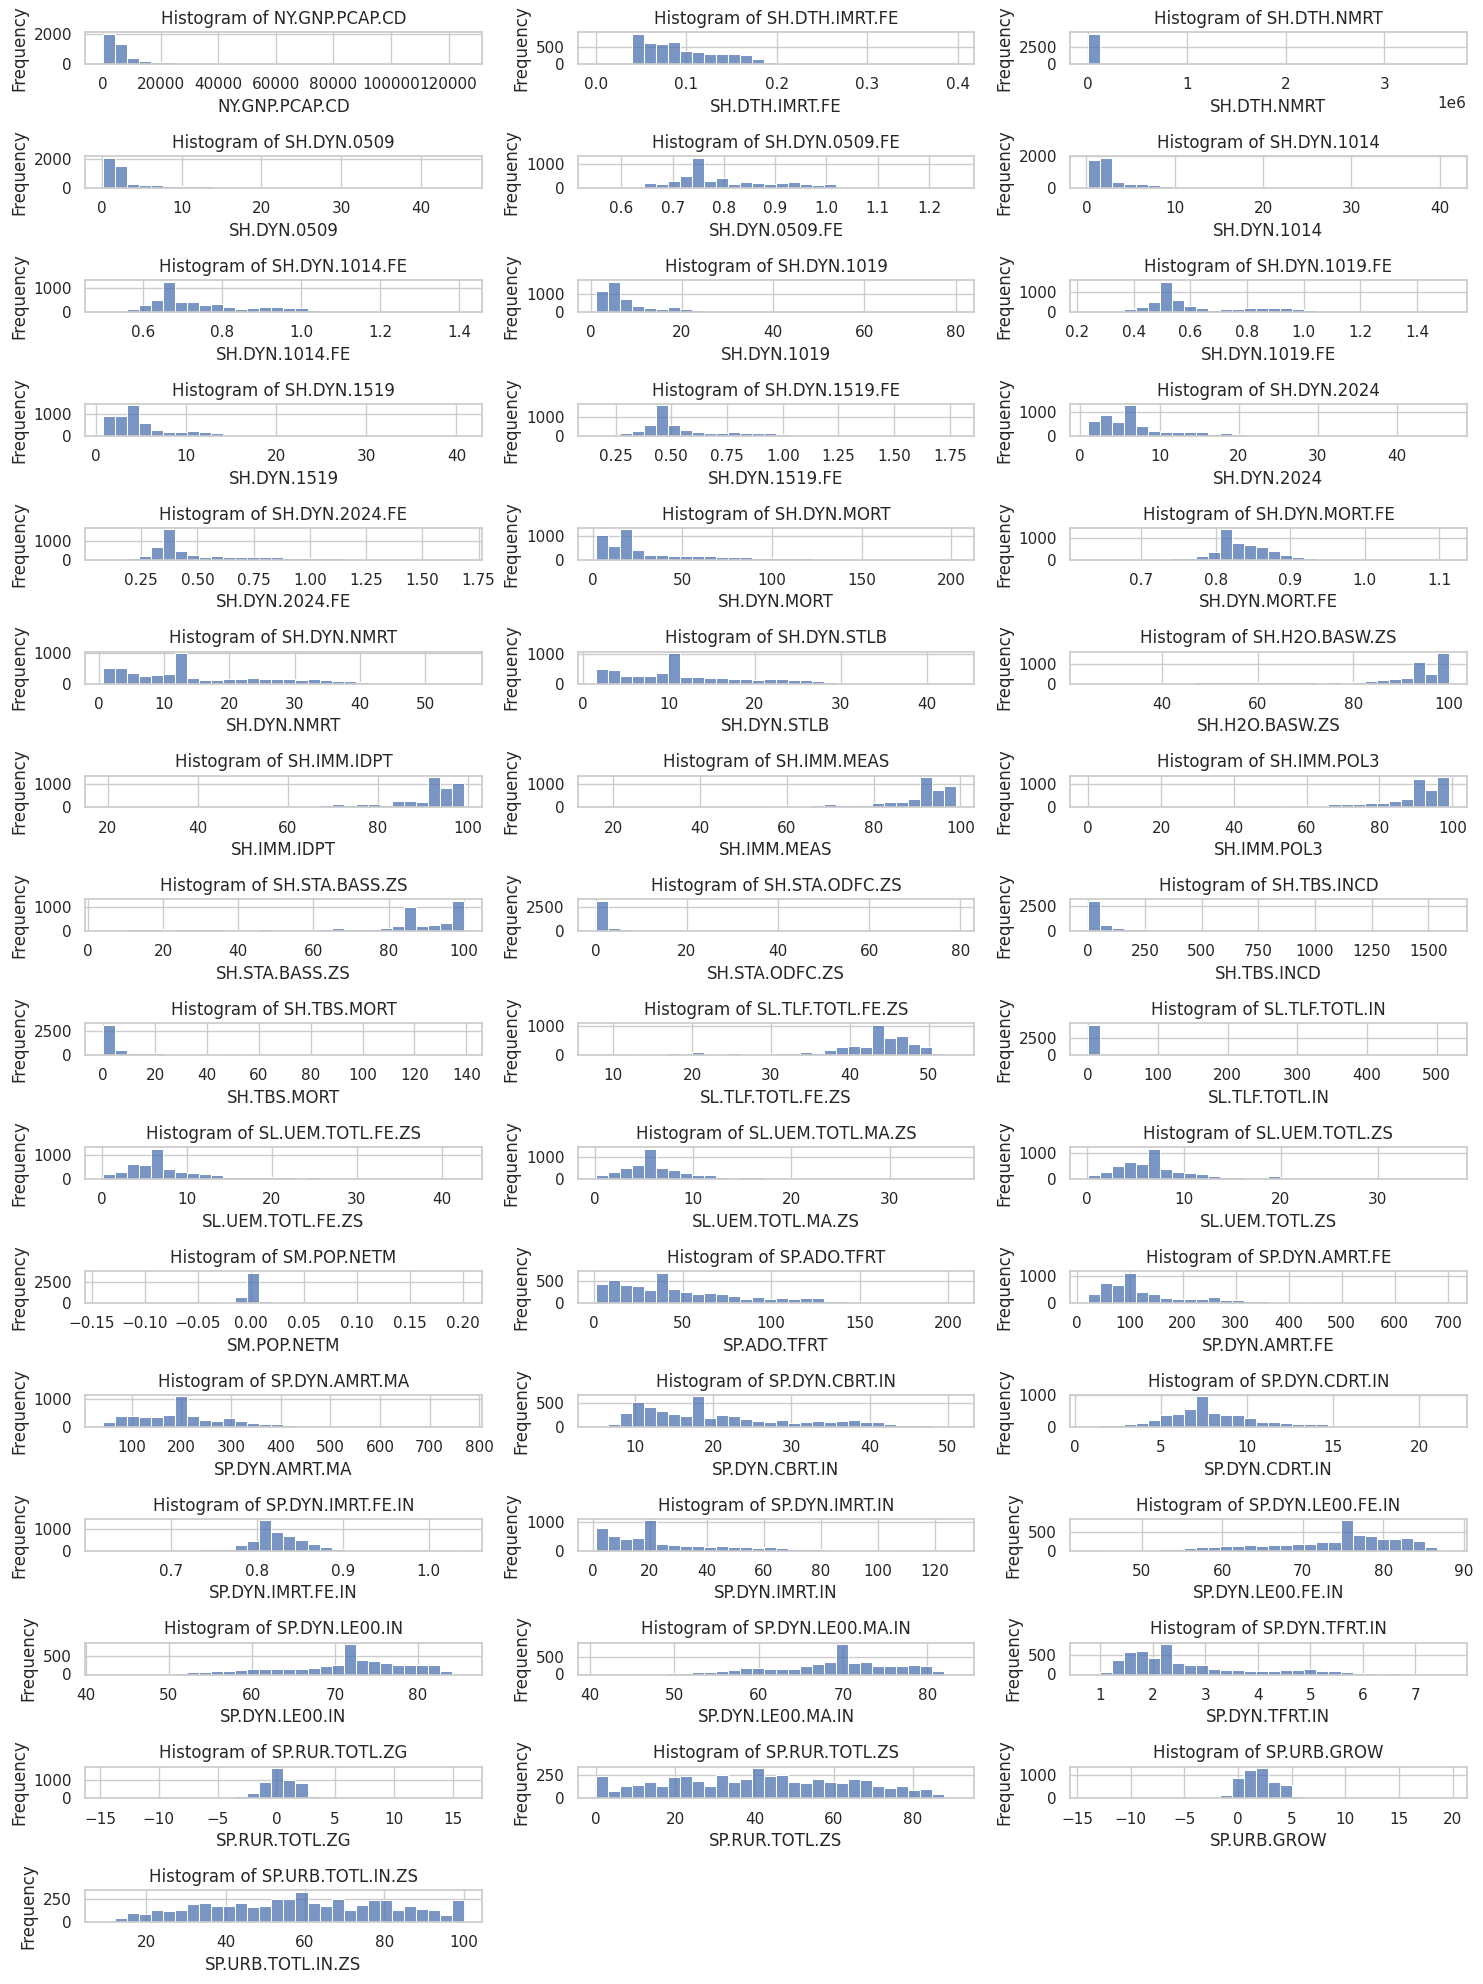

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Calculate the number of rows and columns for the subplots
n_vars = len(df2nf.columns)
n_cols = 3  # You can adjust the number of columns

n_rows = math.ceil(n_vars / n_cols)

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot histograms in a 2D grid without logarithmic scale
for i, column in enumerate(df2nf.columns):
    sns.histplot(df2nf[column], kde=False, bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots
for i in range(n_vars, n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

## Clusterización

Se puede ver que una buena cantidad de clusters son 3:

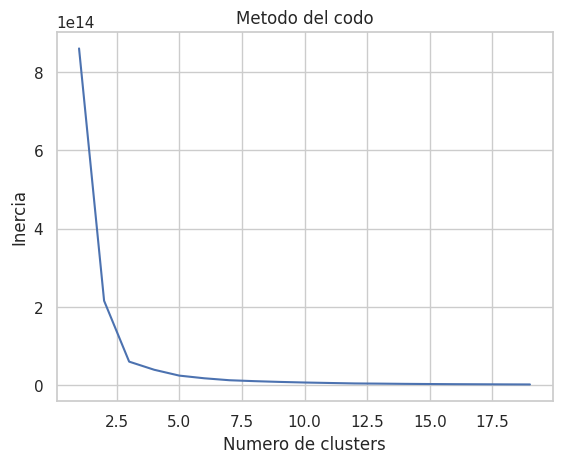

In [ ]:
X=df2nf
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

In [ ]:
df_norm_2 = X.copy()
df_norm_2['labels'] = pred_y

In [ ]:
df_norm_2.groupby('labels').mean()

Series Code,NY.GNP.PCAP.CD,SH.DTH.IMRT.FE,SH.DTH.NMRT,SH.DYN.0509,SH.DYN.0509.FE,SH.DYN.1014,SH.DYN.1014.FE,SH.DYN.1019,SH.DYN.1019.FE,SH.DYN.1519,SH.DYN.1519.FE,SH.DYN.2024,SH.DYN.2024.FE,SH.DYN.MORT,SH.DYN.MORT.FE,SH.DYN.NMRT,SH.DYN.STLB,SH.H2O.BASW.ZS,SH.IMM.IDPT,SH.IMM.MEAS,SH.IMM.POL3,SH.STA.BASS.ZS,SH.STA.ODFC.ZS,SH.TBS.INCD,SH.TBS.MORT,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS,SM.POP.NETM,SP.ADO.TFRT,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.IMRT.FE.IN,SP.DYN.IMRT.IN,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,SP.DYN.TFRT.IN,SP.RUR.TOTL.ZG,SP.RUR.TOTL.ZS,SP.URB.GROW,SP.URB.TOTL.IN.ZS
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,13186.139461,0.100804,1.989956e+04,3.452899,0.791451,2.621191,0.742630,7.647451,0.600229,5.030737,0.549850,7.025547,0.498936,31.278645,0.833813,13.745975,11.223512,88.551723,88.822836,87.925070,88.732571,77.703975,6.929661,108.391913,12.191339,41.390241,15.409256,8.927740,7.105390,7.673086,-0.000300,48.178376,132.092677,205.645533,20.333899,7.934194,0.822457,23.351276,74.268858,71.514355,68.879369,2.686303,0.217424,40.064177,1.875641,59.935823
1,4580.112734,0.084507,2.671902e+06,5.206480,0.912662,3.534064,0.858607,9.244547,0.791805,5.711702,0.752023,7.368099,0.694805,53.616607,0.923099,24.094670,18.034664,85.436019,80.898964,81.134215,80.865980,62.516407,17.149545,152.724138,19.120690,37.124823,0.428277,6.301143,6.145329,6.194412,-0.000605,53.084628,137.630073,206.958595,21.300584,7.697973,0.880542,39.166665,71.547502,69.201722,67.007503,2.669448,0.351182,53.454617,2.461276,46.545383
2,1456.958991,0.060340,9.783365e+05,9.793716,0.920869,6.019509,0.909249,15.715244,0.883579,9.760013,0.868798,12.733234,0.874438,82.139499,0.909137,30.774641,22.633653,67.116257,73.089944,71.925983,73.255104,39.218088,24.264737,132.549407,17.207510,39.582678,0.373640,6.211490,5.701884,5.904167,-0.000868,91.950167,237.460827,299.428260,32.837104,9.266356,0.861428,55.650559,63.284130,61.514714,59.802864,4.366698,1.586635,63.937665,3.609713,36.062335


En los tres clusters, los clusters varían en riqueza: el 0 es el más rico, y el 2 el más pobre. Todo lo demás es coherente con esto: por ejemplo, 0 es el más urbanizado y 2 el menos urbanizado. El 0 es el que practica menos defecación abierta y el 2 el que más. El 0 es el que tiene menos muertes neonatales y 2 el que más, etc.

Reemplazamos todos los '.' por '_'

## Análisis de causas de mortalidad infantil

In [ ]:
df2nf.columns = df2nf.columns.str.replace('.', '_')

<ipython-input-124-638319dc1da0>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2nf.columns = df2nf.columns.str.replace('.', '_')


Podemos ver que la tasa de mortalidad de 0 a 5 años es un 17% causado por el PBI per capita.

In [ ]:
model = 'SH_DYN_MORT ~ NY_GNP_PCAP_CD'
lm    = sm.ols(formula = model, data = df2nf).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            SH_DYN_MORT   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     1065.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):          3.13e-212
Time:                        00:40:02   Log-Likelihood:                -24495.
No. Observations:                5054   AIC:                         4.899e+04
Df Residuals:                    5052   BIC:                         4.901e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         44.0802      0.529     83.

In [ ]:
def forward_selection(data, target,random_seed,initial_feature=None,significance_level=0.1):
    np.random.seed(random_seed)
    initial_features = data.columns.tolist()
    best_features = [initial_feature]
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm2.OLS(target, sm_tools.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
X = df2nf.drop(columns='SH_DYN_MORT')
y = df2nf['SH_DYN_MORT']

Uso la forward selection, porque me parece la más útil para obtener la mínima cantidad de variables. Estoy fijando el PBI per capita como primer feature, porque me interesa separar el componente que sea puramente económico, y descubrir qué componete no-económico está afectando la mortalidad infantil.

In [ ]:
forward_selection(X,y,random_seed=1,initial_feature='NY_GNP_PCAP_CD')

<ipython-input-126-29d4864147a5>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-126-29d4864147a5>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-126-29d4864147a5>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-126-29d4864147a5>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-1

['NY_GNP_PCAP_CD',
 'SH_DYN_1019_FE',
 'SP_DYN_LE00_MA_IN',
 'SH_DYN_NMRT',
 'SH_DYN_1019',
 'SH_DYN_0509',
 'SP_DYN_IMRT_IN',
 'SP_ADO_TFRT',
 'SP_DYN_CDRT_IN',
 'SH_TBS_MORT',
 'SP_DYN_LE00_FE_IN',
 'SH_DYN_1014',
 'SH_STA_ODFC_ZS',
 'SH_DYN_MORT_FE',
 'SP_DYN_IMRT_FE_IN',
 'SH_DYN_0509_FE',
 'SH_DYN_2024',
 'SM_POP_NETM',
 'SP_URB_TOTL_IN_ZS',
 'SL_UEM_TOTL_MA_ZS',
 'SP_DYN_TFRT_IN',
 'SP_RUR_TOTL_ZS',
 'SP_DYN_LE00_IN',
 'SP_DYN_AMRT_FE',
 'SP_DYN_AMRT_MA',
 'SH_STA_BASS_ZS',
 'SH_DYN_1014_FE',
 'SH_DYN_1519_FE',
 'SH_DTH_IMRT_FE',
 'SL_TLF_TOTL_IN',
 'SH_IMM_IDPT',
 'SH_IMM_MEAS',
 'SH_DTH_NMRT']

El resultado es bastante inútil: lo que más correlaciona con la mortalidad infantil es la expectativa de vida, etc. Voy a descartar todos los componentes relacionados a mortalidad y quedarme con el resto.

In [ ]:
df2nf.columns = df2nf.columns.str.replace('_', '.')
filtered_df = df2[df2['Series Code'].isin(df2nf.columns.values)]
result_df = filtered_df[['Series Name','Series Code']].drop_duplicates()
pd.set_option('display.max_rows', None)
print(result_df)

                                              Series Name        Series Code
266     Adolescent fertility rate (births per 1,000 wo...        SP.ADO.TFRT
17822                Birth rate, crude (per 1,000 people)     SP.DYN.CBRT.IN
27132                Death rate, crude (per 1,000 people)     SP.DYN.CDRT.IN
32452            Fertility rate, total (births per woman)     SP.DYN.TFRT.IN
32718          GNI per capita, Atlas method (current US$)     NY.GNP.PCAP.CD
35910   Immunization, DPT (% of children ages 12-23 mo...        SH.IMM.IDPT
36708   Immunization, measles (% of children ages 12-2...        SH.IMM.MEAS
37240     Immunization, Pol3 (% of one-year-old children)        SH.IMM.POL3
38836      Incidence of tuberculosis (per 100,000 people)        SH.TBS.INCD
39634        Labor force, female (% of total labor force)  SL.TLF.TOTL.FE.ZS
39900                                  Labor force, total     SL.TLF.TOTL.IN
40166            Life expectancy at birth, female (years)  SP.DYN.LE00.FE.IN

In [ ]:
df_seleccion=df2nf.drop(['SP.DYN.CDRT.IN','SP.DYN.LE00.FE.IN','SP.DYN.LE00.MA.IN','SP.DYN.LE00.IN','SP.DYN.AMRT.FE','SP.DYN.AMRT.MA','SP.DYN.IMRT.IN','SP.DYN.IMRT.FE.IN','SH.DYN.NMRT','SH.DYN.MORT.FE','SH.DYN.1014','SH.DYN.1014.FE','SH.DYN.1019','SH.DYN.1019.FE','SH.DYN.1519','SH.DYN.1519.FE','SH.DYN.0509','SH.DYN.0509.FE','SH.DYN.2024','SH.DYN.2024.FE','SH.DYN.STLB'], axis=1)
df_seleccion.columns = df_seleccion.columns.str.replace('.', '_')
df_seleccion.shape

<ipython-input-130-5fe4ccefac22>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_seleccion.columns = df_seleccion.columns.str.replace('.', '_')


(5054, 25)

Eliminado las columnas que están relacionadas con la mortalidad (exceptuando la mortalidad infantil en sí), quedan 25.

In [ ]:
X = df_seleccion.drop(columns='SH_DYN_MORT')
y = df_seleccion['SH_DYN_MORT']

forward_selection(X,y,initial_feature='NY_GNP_PCAP_CD',random_seed=1)

<ipython-input-126-29d4864147a5>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-126-29d4864147a5>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-126-29d4864147a5>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-126-29d4864147a5>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-1

['NY_GNP_PCAP_CD',
 'SH_H2O_BASW_ZS',
 'SP_DYN_TFRT_IN',
 'SH_IMM_IDPT',
 'SH_STA_BASS_ZS',
 'SH_TBS_INCD',
 'SP_ADO_TFRT',
 'SH_DTH_NMRT',
 'SH_DTH_IMRT_FE',
 'SP_RUR_TOTL_ZS',
 'SP_URB_TOTL_IN_ZS',
 'SM_POP_NETM',
 'SH_STA_ODFC_ZS',
 'SL_UEM_TOTL_MA_ZS',
 'SL_UEM_TOTL_ZS',
 'SH_TBS_MORT',
 'SL_TLF_TOTL_IN',
 'SP_DYN_CBRT_IN']

In [ ]:
model = 'SH_DYN_MORT ~ NY_GNP_PCAP_CD'
lm    = sm.ols(formula = model, data = df_seleccion).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            SH_DYN_MORT   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     1065.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):          3.13e-212
Time:                        00:40:24   Log-Likelihood:                -24495.
No. Observations:                5054   AIC:                         4.899e+04
Df Residuals:                    5052   BIC:                         4.901e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         44.0802      0.529     83.

Acá descubrimos algo IMPORTANTISIMO. EL PBI per capita sólo contribuye un 17% a la disminución de la mortalidad infantil. Pero si tiene agua potable, esto sube al 73%!!!!!

In [ ]:
model = 'SH_DYN_MORT ~ NY_GNP_PCAP_CD+SH_H2O_BASW_ZS'
lm    = sm.ols(formula = model, data = df_seleccion).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            SH_DYN_MORT   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     6767.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:40:24   Log-Likelihood:                -21687.
No. Observations:                5054   AIC:                         4.338e+04
Df Residuals:                    5051   BIC:                         4.340e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        186.1885      1.433    129.

Si se agrega la tasa de natalidad, sube a una predicción del 82%

In [ ]:
model = 'SH_DYN_MORT ~ NY_GNP_PCAP_CD+SH_H2O_BASW_ZS+SP_DYN_CBRT_IN'
lm    = sm.ols(formula = model, data = df_seleccion).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            SH_DYN_MORT   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     7281.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:40:24   Log-Likelihood:                -20752.
No. Observations:                5054   AIC:                         4.151e+04
Df Residuals:                    5050   BIC:                         4.154e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         67.3657      2.769     24.

Por último, hacemos algo similar con una IA clasificadora.

In [ ]:
z=y>22
print(np.sum(z),len(z)-np.sum(z),len(z))

2142 2912 5054


In [ ]:
Xdim=X[['NY_GNP_PCAP_CD','SH_H2O_BASW_ZS']]

In [ ]:
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(Xdim,z,test_size=0.2, random_state=1)
# Creamos un modelo Random Forest con parametros por defect, limito el max_depth para evitar overfitting
#modelo = RandomForestClassifier(max_depth=2,random_state=1)
#Creamos un modelo GradientBoostingClassifier para evitar el opverfitting
modelo = GradientBoostingClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)

<Figure size 1000x600 with 0 Axes>

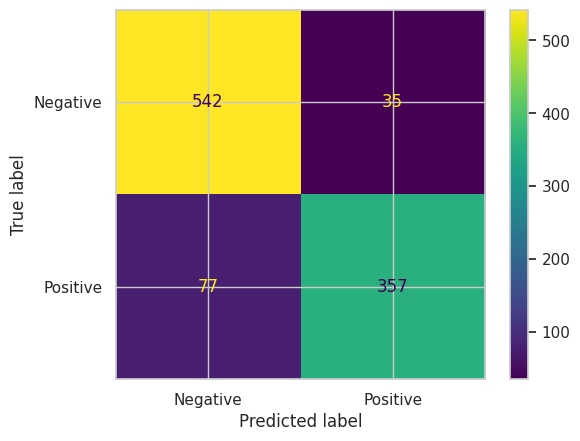

In [ ]:
plt.figure(figsize=(10,6))
metrics.ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test, display_labels=['Negative', 'Positive'])

De esta manera, entre el PBI per capita y el acceso al agua potable, la predicción ya es del 91%

In [ ]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       0.88      0.94      0.91       577
        True       0.91      0.82      0.86       434

    accuracy                           0.89      1011
   macro avg       0.89      0.88      0.89      1011
weighted avg       0.89      0.89      0.89      1011



Y el modelo no está overfiteado

In [ ]:
preds = modelo.predict(X_train)
print(metrics.classification_report(y_train, preds))

              precision    recall  f1-score   support

       False       0.90      0.93      0.92      2335
        True       0.90      0.86      0.88      1708

    accuracy                           0.90      4043
   macro avg       0.90      0.89      0.90      4043
weighted avg       0.90      0.90      0.90      4043



Y ya que estamos, con las cloacas pasa lo mismo que con el agua potable?

In [ ]:
model = 'SH_DYN_MORT ~ NY_GNP_PCAP_CD+SH_STA_BASS_ZS'
lm    = sm.ols(formula = model, data = df_seleccion).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            SH_DYN_MORT   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     6571.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:40:25   Log-Likelihood:                -21741.
No. Observations:                5054   AIC:                         4.349e+04
Df Residuals:                    5051   BIC:                         4.351e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        114.9380      0.773    148.

Las cloacas son tan importantes como el agua potable, para comprender la mortalidad infantil.

## Conclusiones

Lo que podemos ver con mucha claridad es que el nivel económico no alcanza para disminuir la mortalidad infantil. La clave parecen ser servicios básicos como el agua potable o cloacas.

# Insights finales

Se muestra a lo largo de este trabajo que las muertes por desesperación (tales como suicidios, o drogadicción) son independientes del nivel de ingresos. Por otro lado se muestra que la disminución de la mortalidad infantil requiere desarrollo, y no solamente crecimiento del ingreso.